Problem 1: Linear Regression

The comp-activ databases is a collection of a computer systems activity measures . The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs.

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

Dataset for Problem 1: compactiv.xlsx

DATA DICTIONARY:
System measures used:

lread - Reads (transfers per second ) between system memory and user memory lwrite - writes (transfers per second) between system memory and user memory scall - Number of system calls of all types per second sread - Number of system read calls per second . swrite - Number of system write calls per second . fork - Number of system fork calls per second. exec - Number of system exec calls per second. rchar - Number of characters transferred per second by system read calls wchar - Number of characters transfreed per second by system write calls pgout - Number of page out requests per second ppgout - Number of pages, paged out per second pgfree - Number of pages per second placed on the free list. pgscan - Number of pages checked if they can be freed per second atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second pgin - Number of page-in requests per second ppgin - Number of pages paged in per second pflt - Number of page faults caused by protection errors (copy-on-writes). vflt - Number of page faults caused by address translation . runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run. Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.) freemem - Number of memory pages available to user processes freeswap - Number of disk blocks available for page swapping.

1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [259]:
%matplotlib inline
import numpy as np   
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import metrics
from sklearn import metrics,model_selection
import statsmodels.api as sm
from sklearn.preprocessing import scale
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import pandas as pd    
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt   
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

Reading the data

In [3]:
m9 = pd.read_excel("Desktop/compactiv.xlsx")  

EDA

Checking the head

In [4]:
m9.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

Checking the tail 

In [5]:
m9.tail()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[5 rows x 22 columns]

Checking the info

In [6]:
m9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

Describe the data (5 Point summary)

In [7]:
m9.describe()

lread       lwrite         scall        sread       swrite  \
count  8192.000000  8192.000000   8192.000000  8192.000000  8192.000000   
mean     19.559692    13.106201   2306.318237   210.479980   150.058228   
std      53.353799    29.891726   1633.617322   198.980146   160.478980   
min       0.000000     0.000000    109.000000     6.000000     7.000000   
25%       2.000000     0.000000   1012.000000    86.000000    63.000000   
50%       7.000000     1.000000   2051.500000   166.000000   117.000000   
75%      20.000000    10.000000   3317.250000   279.000000   185.000000   
max    1845.000000   575.000000  12493.000000  5318.000000  5456.000000   

              fork         exec         rchar         wchar        pgout  ...  \
count  8192.000000  8192.000000  8.088000e+03  8.177000e+03  8192.000000  ...   
mean      1.884554     2.791998  1.973857e+05  9.590299e+04     2.285317  ...   
std       2.479493     5.212456  2.398375e+05  1.408417e+05     5.307038  ...   
min       0.000000     0.000000  2.780000e+02  1.498000e+03     0.000000  ...   
25%       0.400000     0.200000  3.409150e+04  2.291600e+04     0.000000  ...   
50%       0.800000     1.200000  1.254735e+05  4.661900e+04     0.000000  ...   
75%       2.200000     2.800000  2.678288e+05  1.061010e+05     2.400000  ...   
max      20.120000    59.560000  2.526649e+06  1.801623e+06    81.440000  ...   

            pgfree       pgscan         atch         pgin        ppgin  \
count  8192.000000  8192.000000  8192.000000  8192.000000  8192.000000   
mean     11.919712    21.526849     1.127505     8.277960    12.388586   
std      32.363520    71.141340     5.708347    13.874978    22.281318   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.600000     0.600000   
50%       0.000000     0.000000     0.000000     2.800000     3.800000   
75%       5.000000     0.000000     0.600000     9.765000    13.800000   
max     523.000000  1237.000000   211.580000   141.200000   292.610000   

              pflt         vflt       freemem      freeswap          usr  
count  8192.000000  8192.000000   8192.000000  8.192000e+03  8192.000000  
mean    109.793799   185.315796   1763.456299  1.328126e+06    83.968872  
std     114.419221   191.000603   2482.104511  4.220194e+05    18.401905  
min       0.000000     0.200000     55.000000  2.000000e+00     0.000000  
25%      25.000000    45.400000    231.000000  1.042624e+06    81.000000  
50%      63.800000   120.400000    579.000000  1.289290e+06    89.000000  
75%     159.600000   251.800000   2002.250000  1.730380e+06    94.000000  
max     899.800000  1365.000000  12027.000000  2.243187e+06    99.000000  

[8 rows x 21 columns]

Shape of the data

In [8]:
m9.shape

(8192, 22)

Check the columns

In [9]:
m9.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

Checking for Null values

In [10]:
m9.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

Checking for duplicated values

In [11]:
m9.duplicated().sum()

0

Checking for datatypes

In [16]:
m9.dtypes

lread         int64
lwrite        int64
scall         int64
sread         int64
swrite        int64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
pgscan      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz       object
freemem       int64
freeswap      int64
usr           int64
dtype: object

Correlation

In [12]:
corr = m9.corr()
corr

lread    lwrite     scall     sread    swrite      fork  \
lread     1.000000  0.533737  0.191377  0.132881  0.119953  0.140284   
lwrite    0.533737  1.000000  0.143404  0.128403  0.101524  0.052511   
scall     0.191377  0.143404  1.000000  0.696887  0.619984  0.446766   
sread     0.132881  0.128403  0.696887  1.000000  0.881069  0.416721   
swrite    0.119953  0.101524  0.619984  0.881069  1.000000  0.376876   
fork      0.140284  0.052511  0.446766  0.416721  0.376876  1.000000   
exec      0.110965  0.038237  0.308999  0.164084  0.103643  0.763974   
rchar     0.107973  0.115121  0.351413  0.502397  0.331386  0.281229   
wchar     0.081571  0.091718  0.274092  0.401784  0.394230  0.060790   
pgout     0.082463  0.067013  0.194529  0.193679  0.151371  0.130192   
ppgout    0.130590  0.079485  0.208400  0.225906  0.159442  0.166872   
pgfree    0.114438  0.065692  0.199778  0.212911  0.145458  0.168082   
pgscan    0.087783  0.042608  0.177908  0.194272  0.120180  0.160839   
atch      0.021563  0.028310  0.077969  0.085468  0.061373  0.047194   
pgin      0.189799  0.091068  0.241628  0.207012  0.147000  0.163468   
ppgin     0.161345  0.089011  0.219070  0.210225  0.144278  0.132181   
pflt      0.137463  0.067024  0.481781  0.452020  0.396580  0.931040   
vflt      0.165539  0.094965  0.531760  0.491045  0.416571  0.939348   
freemem  -0.083214 -0.091133 -0.387520 -0.286437 -0.248574 -0.123357   
freeswap -0.081293 -0.116478 -0.350629 -0.302036 -0.237062 -0.130442   
usr      -0.141394 -0.111213 -0.323188 -0.332160 -0.272252 -0.363277   

              exec     rchar     wchar     pgout  ...    pgfree    pgscan  \
lread     0.110965  0.107973  0.081571  0.082463  ...  0.114438  0.087783   
lwrite    0.038237  0.115121  0.091718  0.067013  ...  0.065692  0.042608   
scall     0.308999  0.351413  0.274092  0.194529  ...  0.199778  0.177908   
sread     0.164084  0.502397  0.401784  0.193679  ...  0.212911  0.194272   
swrite    0.103643  0.331386  0.394230  0.151371  ...  0.145458  0.120180   
fork      0.763974  0.281229  0.060790  0.130192  ...  0.168082  0.160839   
exec      1.000000  0.169189  0.000547  0.111465  ...  0.146163  0.144855   
rchar     0.169189  1.000000  0.503531  0.211268  ...  0.277786  0.259446   
wchar     0.000547  0.503531  1.000000  0.192436  ...  0.159229  0.113638   
pgout     0.111465  0.211268  0.192436  1.000000  ...  0.730381  0.553916   
ppgout    0.149334  0.269160  0.188876  0.872445  ...  0.917790  0.785256   
pgfree    0.146163  0.277786  0.159229  0.730381  ...  1.000000  0.915217   
pgscan    0.144855  0.259446  0.113638  0.553916  ...  0.915217  1.000000   
atch      0.052307  0.171532  0.181408  0.147759  ...  0.069290  0.038693   
pgin      0.186099  0.299784  0.178290  0.385648  ...  0.532834  0.496826   
ppgin     0.149911  0.347224  0.200880  0.414865  ...  0.593396  0.564991   
pflt      0.645239  0.313246  0.086128  0.151285  ...  0.190468  0.179157   
vflt      0.691754  0.363799  0.111082  0.229129  ...  0.301851  0.283031   
freemem  -0.158565 -0.149485 -0.149060 -0.269687  ... -0.234195 -0.193580   
freeswap -0.153347 -0.220608 -0.226044 -0.245378  ... -0.210184 -0.178119   
usr      -0.288526 -0.329737 -0.288974 -0.221877  ... -0.216278 -0.181488   

              atch      pgin     ppgin      pflt      vflt   freemem  \
lread     0.021563  0.189799  0.161345  0.137463  0.165539 -0.083214   
lwrite    0.028310  0.091068  0.089011  0.067024  0.094965 -0.091133   
scall     0.077969  0.241628  0.219070  0.481781  0.531760 -0.387520   
sread     0.085468  0.207012  0.210225  0.452020  0.491045 -0.286437   
swrite    0.061373  0.147000  0.144278  0.396580  0.416571 -0.248574   
fork      0.047194  0.163468  0.132181  0.931040  0.939348 -0.123357   
exec      0.052307  0.186099  0.149911  0.645239  0.691754 -0.158565   
rchar     0.171532  0.299784  0.347224  0.313246  0.363799 -0.149485   
wchar     0.181408  0.178290  0.200880  0.086128  0.111082 -0.149060   
pgout     0.1

Univariate Analysis

array([[<AxesSubplot:title={'center':'lread'}>,
        <AxesSubplot:title={'center':'lwrite'}>,
        <AxesSubplot:title={'center':'scall'}>,
        <AxesSubplot:title={'center':'sread'}>,
        <AxesSubplot:title={'center':'swrite'}>],
       [<AxesSubplot:title={'center':'fork'}>,
        <AxesSubplot:title={'center':'exec'}>,
        <AxesSubplot:title={'center':'rchar'}>,
        <AxesSubplot:title={'center':'wchar'}>,
        <AxesSubplot:title={'center':'pgout'}>],
       [<AxesSubplot:title={'center':'ppgout'}>,
        <AxesSubplot:title={'center':'pgfree'}>,
        <AxesSubplot:title={'center':'pgscan'}>,
        <AxesSubplot:title={'center':'atch'}>,
        <AxesSubplot:title={'center':'pgin'}>],
       [<AxesSubplot:title={'center':'ppgin'}>,
        <AxesSubplot:title={'center':'pflt'}>,
        <AxesSubplot:title={'center':'vflt'}>,
        <AxesSubplot:title={'center':'freemem'}>,
        <AxesSubplot:title={'center':'freeswap'}>],
       [<AxesSubplot:title={'cen

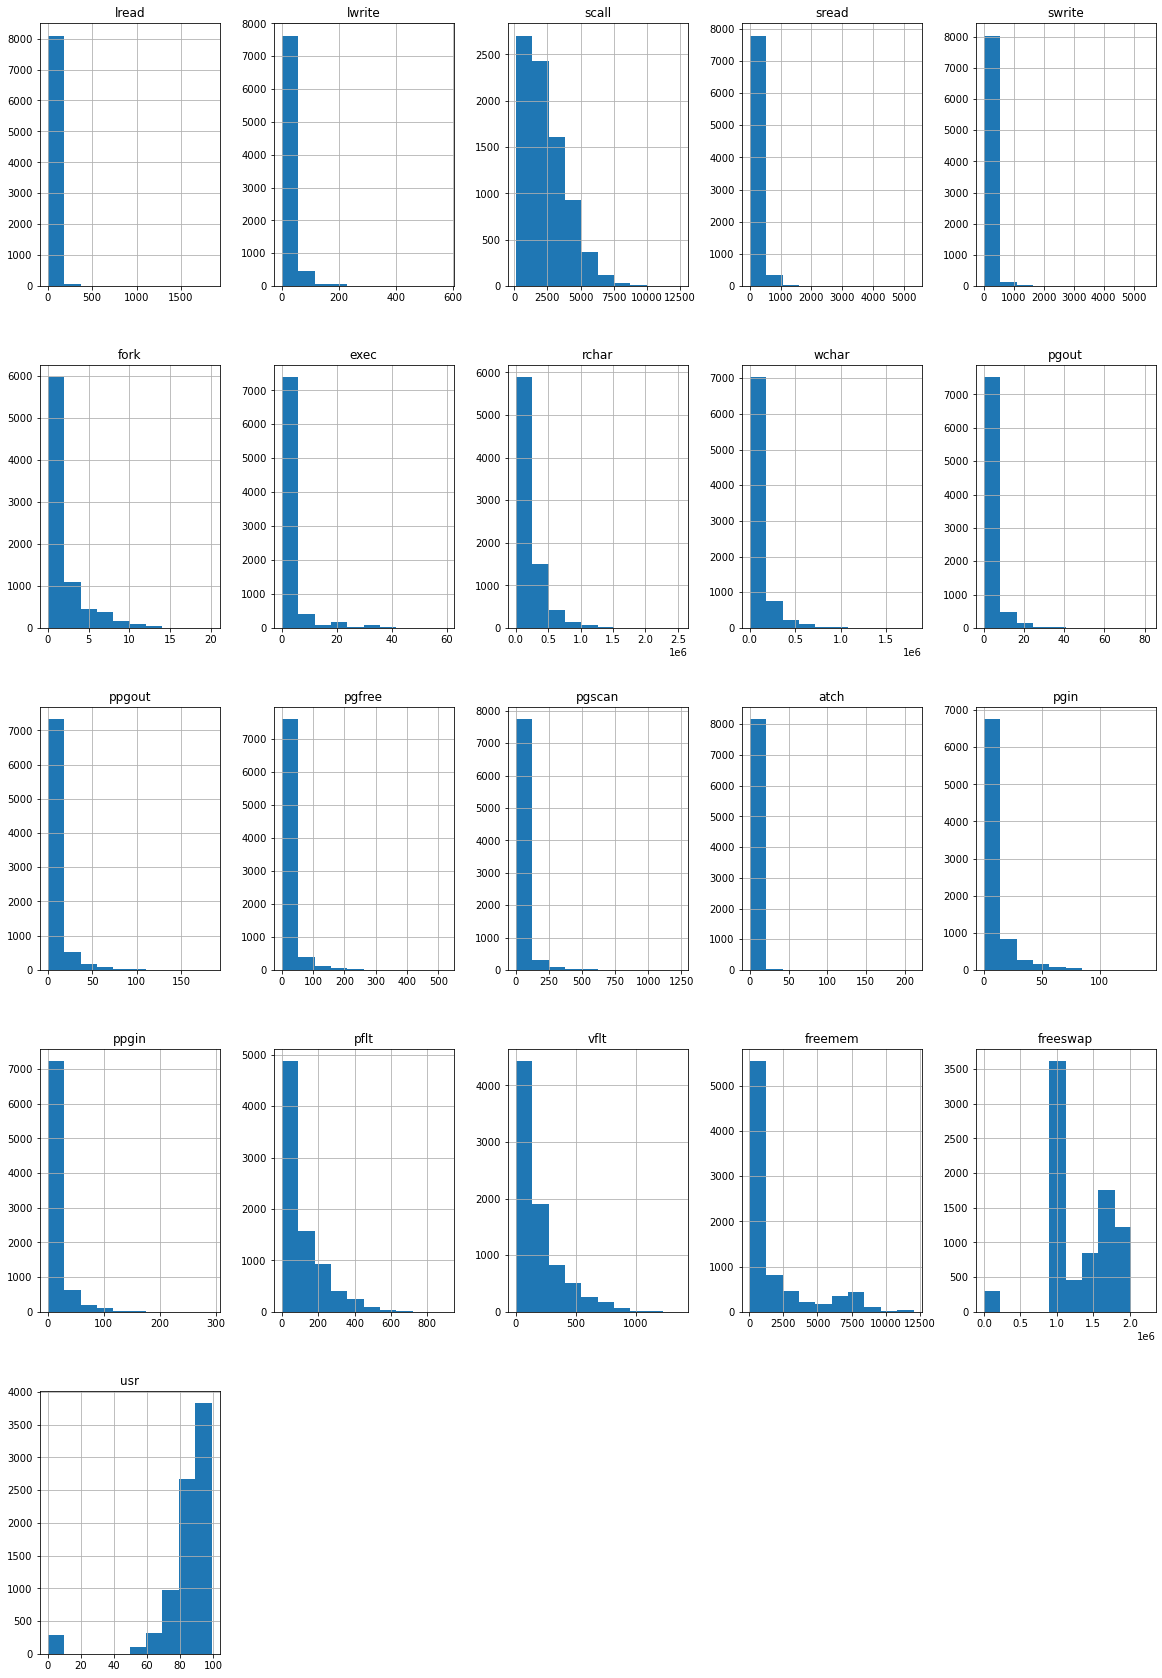

In [13]:
m9.hist(figsize=(20,30))

array(['CPU_Bound', 'Not_CPU_Bound'], dtype=object)

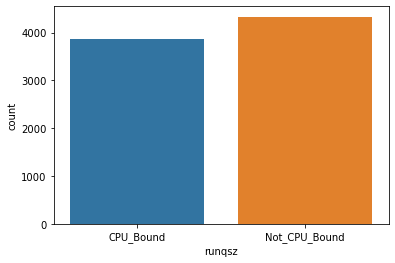

In [45]:
sns.countplot(x=m9['runqsz'])
m9.runqsz.unique()

<AxesSubplot:xlabel='lread', ylabel='count'>

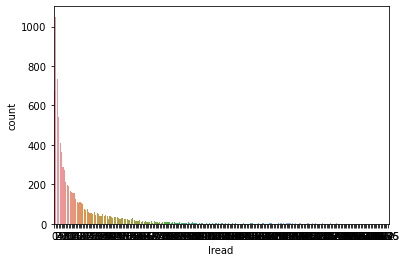

In [17]:
sns.countplot(x=m9['lread'])

<AxesSubplot:xlabel='lwrite', ylabel='count'>

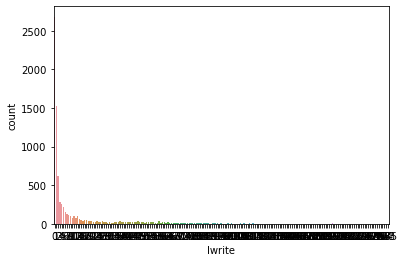

In [18]:
sns.countplot(x=m9['lwrite'])

<AxesSubplot:xlabel='scall', ylabel='count'>

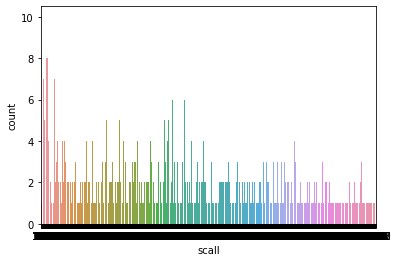

In [19]:
sns.countplot(x=m9['scall'])

<AxesSubplot:xlabel='sread', ylabel='count'>

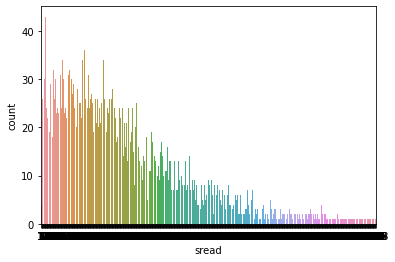

In [20]:
sns.countplot(x=m9['sread'])

Bivariate Analysis

<AxesSubplot:xlabel='lread'>

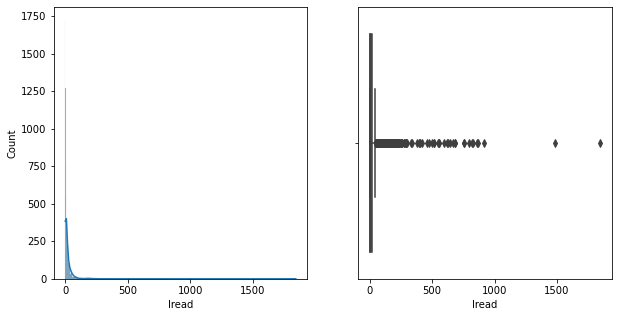

In [21]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(m9.lread, kde=True, ax=axs[0])
sns.boxplot(x='lread',data=m9, ax=axs[1])

<AxesSubplot:xlabel='lwrite'>

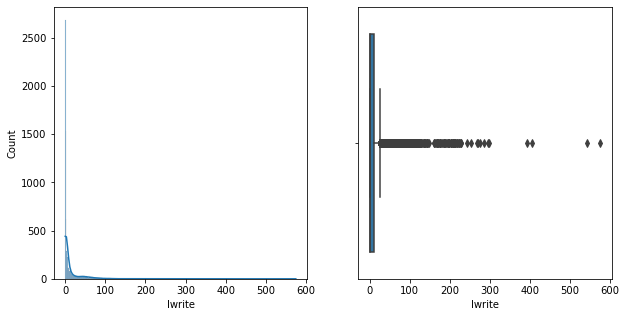

In [22]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(m9.lwrite, kde=True, ax=axs[0])
sns.boxplot(x='lwrite',data=m9, ax=axs[1])

<AxesSubplot:xlabel='scall'>

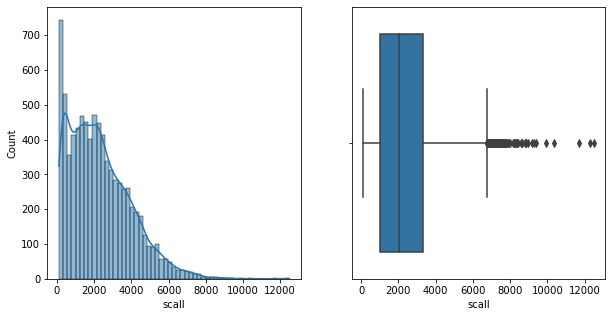

In [23]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(m9.scall, kde=True, ax=axs[0])
sns.boxplot(x='scall',data=m9, ax=axs[1])

<AxesSubplot:xlabel='sread'>

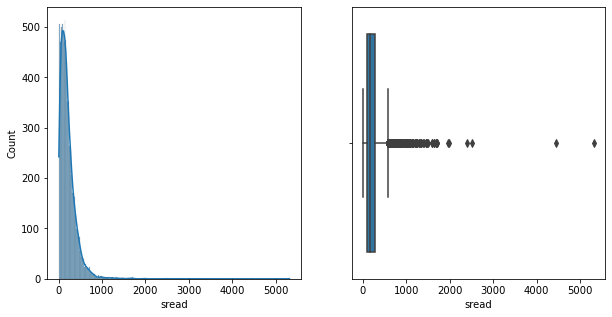

In [24]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(m9.sread, kde=True, ax=axs[0])
sns.boxplot(x='sread',data=m9, ax=axs[1])

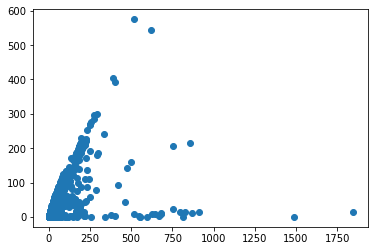

In [26]:
plt.scatter(m9['lread'],m9['lwrite'])

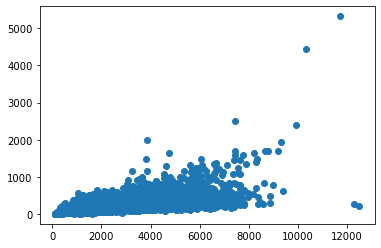

In [27]:
plt.scatter(m9['scall'],m9['sread'])

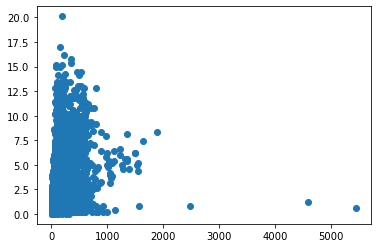

In [28]:
plt.scatter(m9['swrite'],m9['fork'])

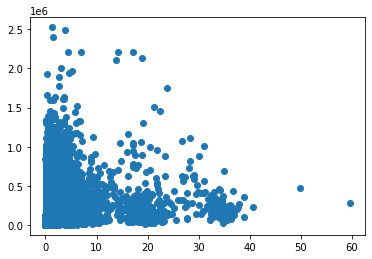

In [29]:
plt.scatter(m9['exec'],m9['rchar'])

<AxesSubplot:xlabel='scall', ylabel='sread'>

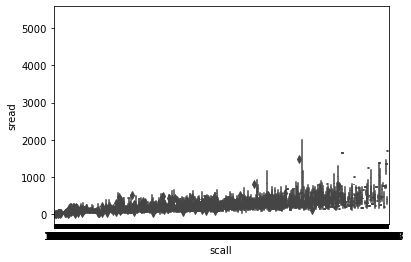

In [30]:
fig_dims = (12, 5)
sns.boxplot(x='scall', y='sread', data=m9)

<AxesSubplot:xlabel='lread', ylabel='lwrite'>

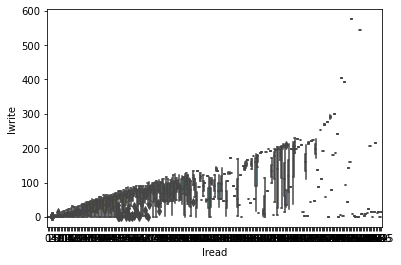

In [32]:
fig_dims = (12, 5)
sns.boxplot(x='lread', y='lwrite', data=m9)

<AxesSubplot:xlabel='exec', ylabel='rchar'>

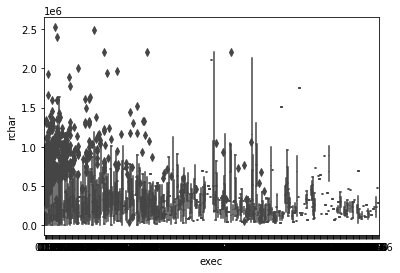

In [33]:
fig_dims = (12, 5)
sns.boxplot(x='exec', y='rchar', data=m9)

<AxesSubplot:xlabel='swrite', ylabel='fork'>

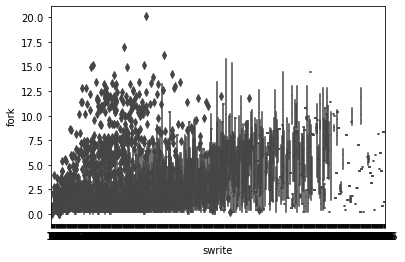

In [31]:
fig_dims = (12, 5)
sns.boxplot(x='swrite', y='fork', data=m9)

<AxesSubplot:>

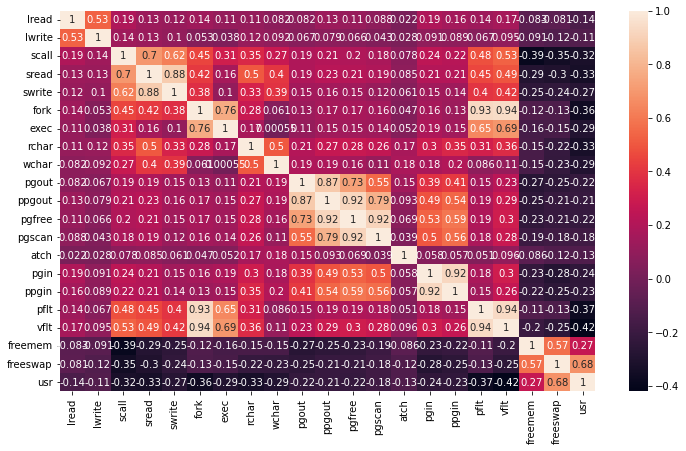

In [43]:
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True)

Multivariate Analysis

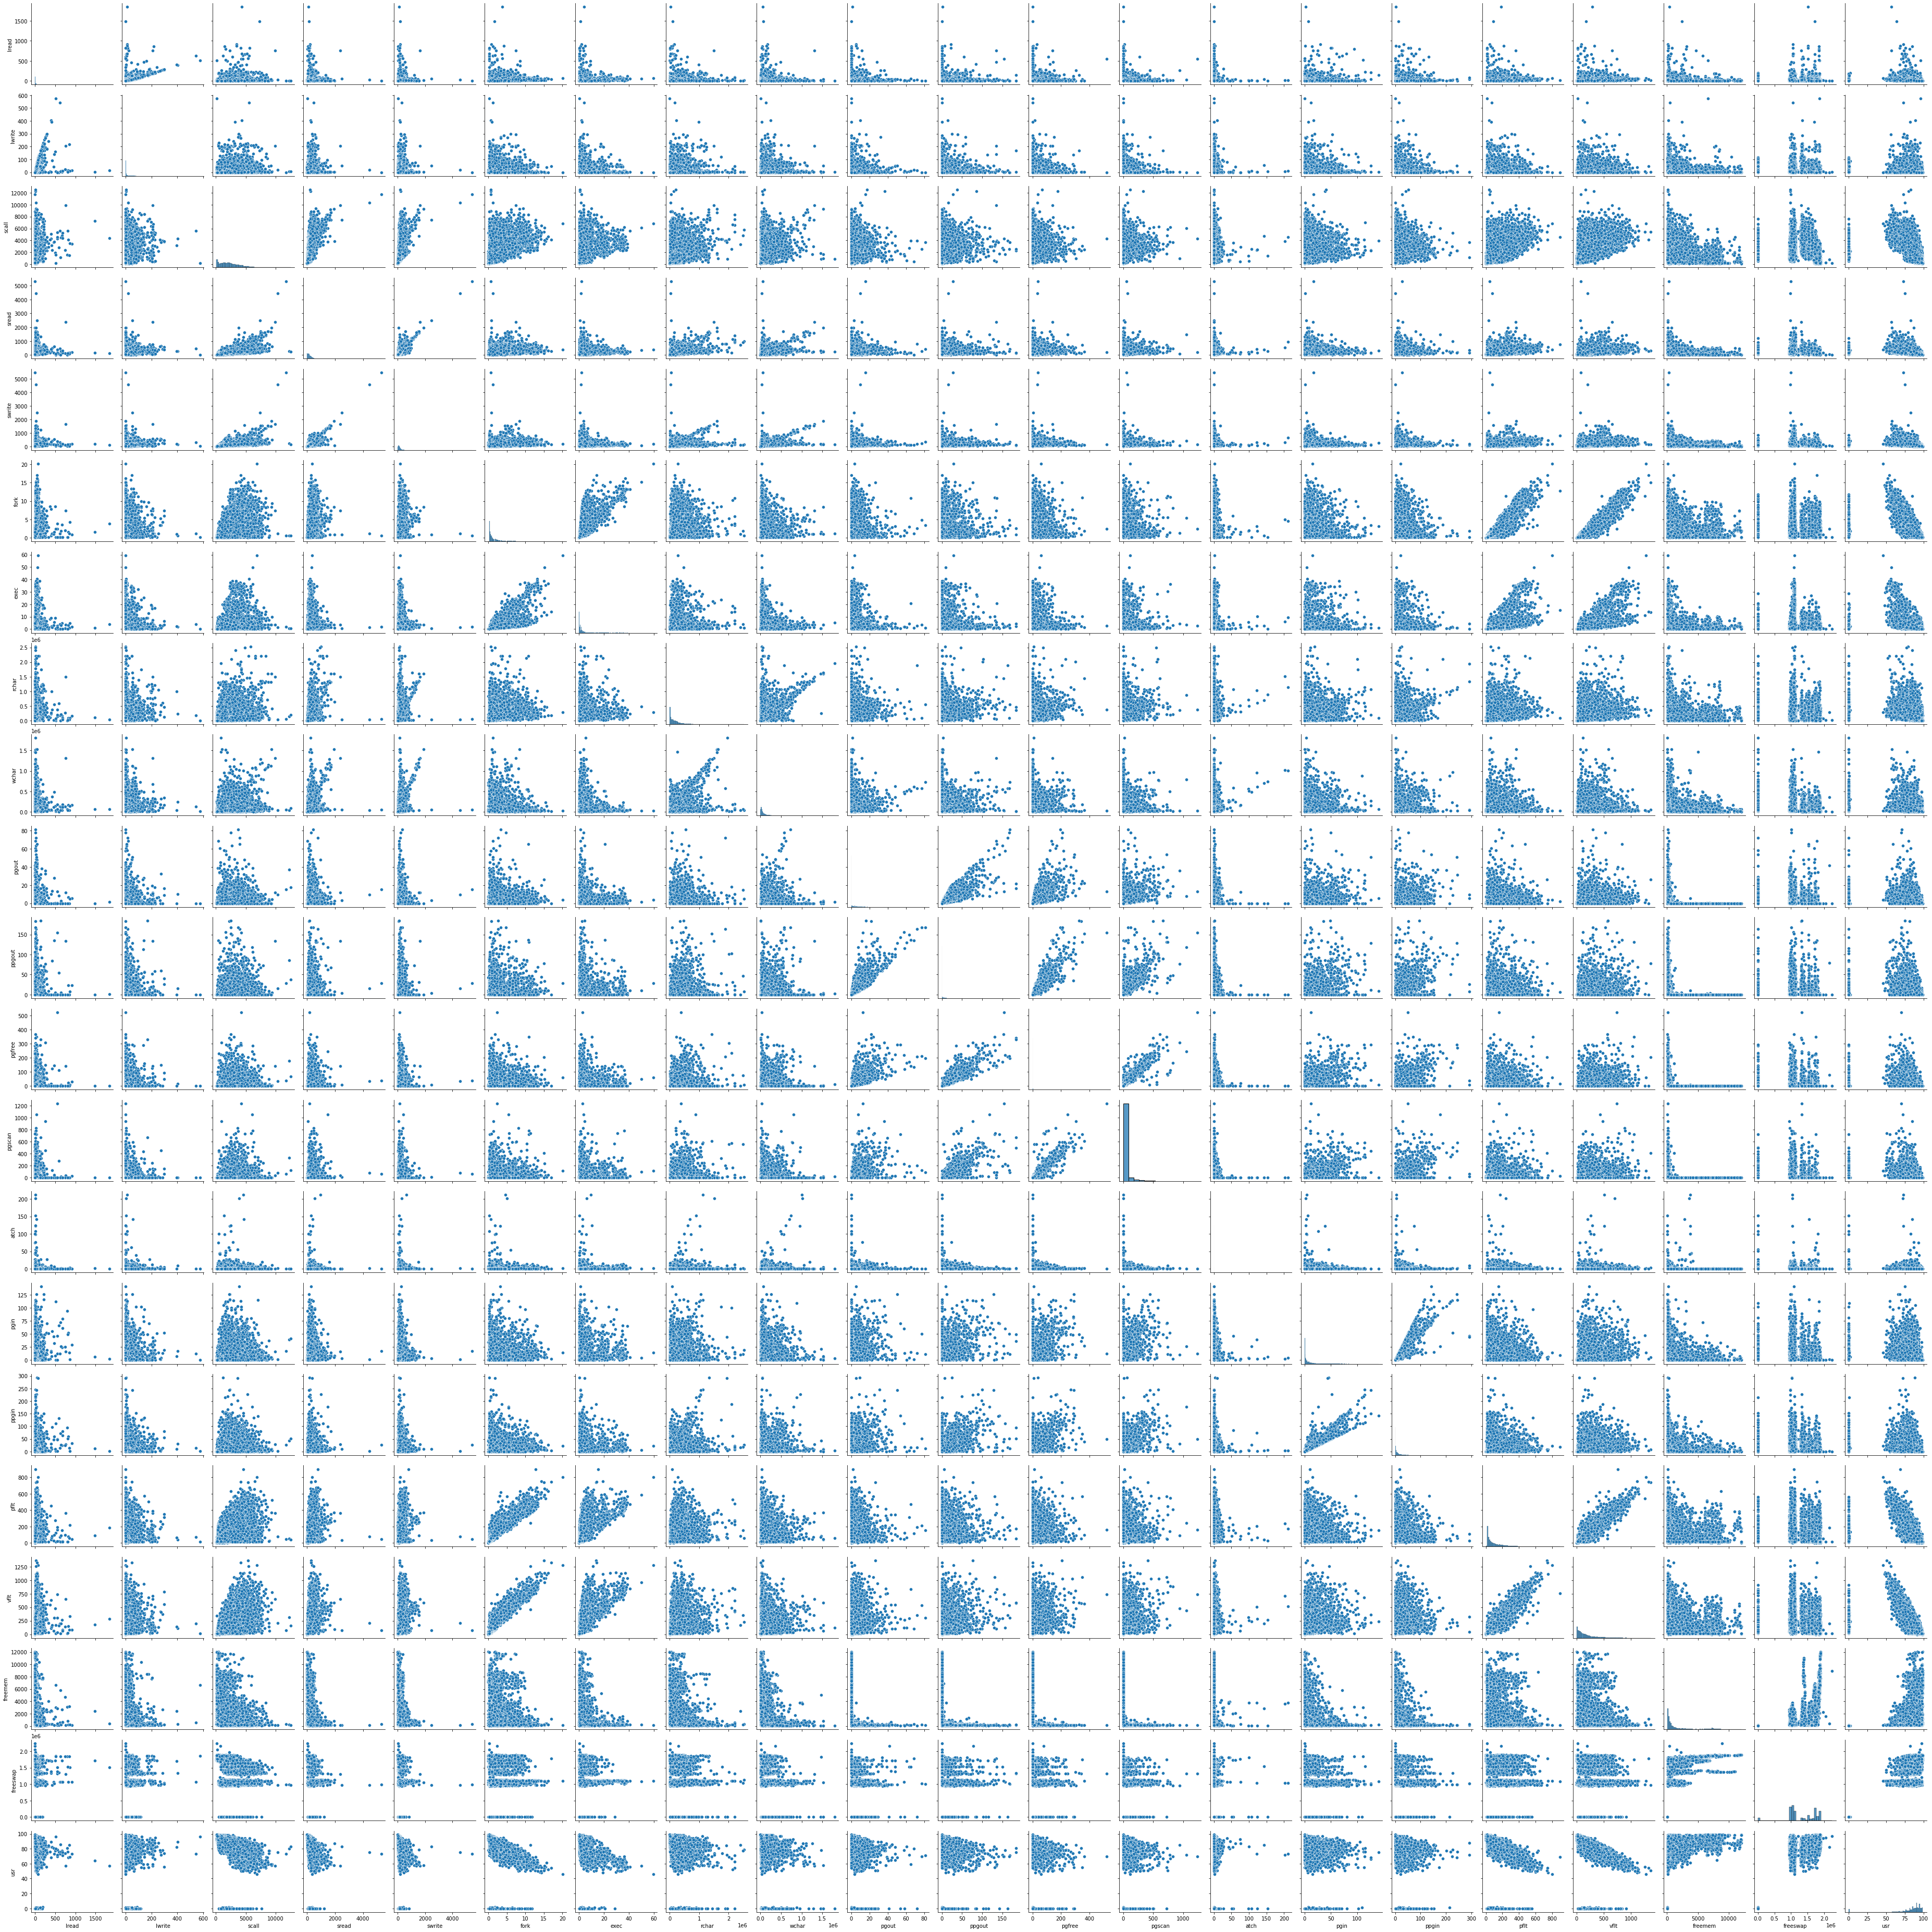

In [25]:
sns.pairplot(m9)
plt.show()

1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

Checking for Null values

In [35]:
m9.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

Treating the Null values

In [36]:
m9['rchar'].fillna(m9.groupby('exec')['rchar'].transform("mean"), inplace=True)

In [37]:
m9['wchar'].fillna(m9.groupby('exec')['wchar'].transform("mean"), inplace=True)

Checking for Null values

In [38]:
m9.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       3
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [39]:
m9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8189 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

Treating Null values

In [47]:
m9.rchar =m9.rchar.fillna(0)

In [48]:
m9.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

Checking for duplicates

In [49]:
m9.duplicated().sum()

0

Checking for outliers

In [50]:
df_num= m9.select_dtypes(include=['float64','int64'])

C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-p

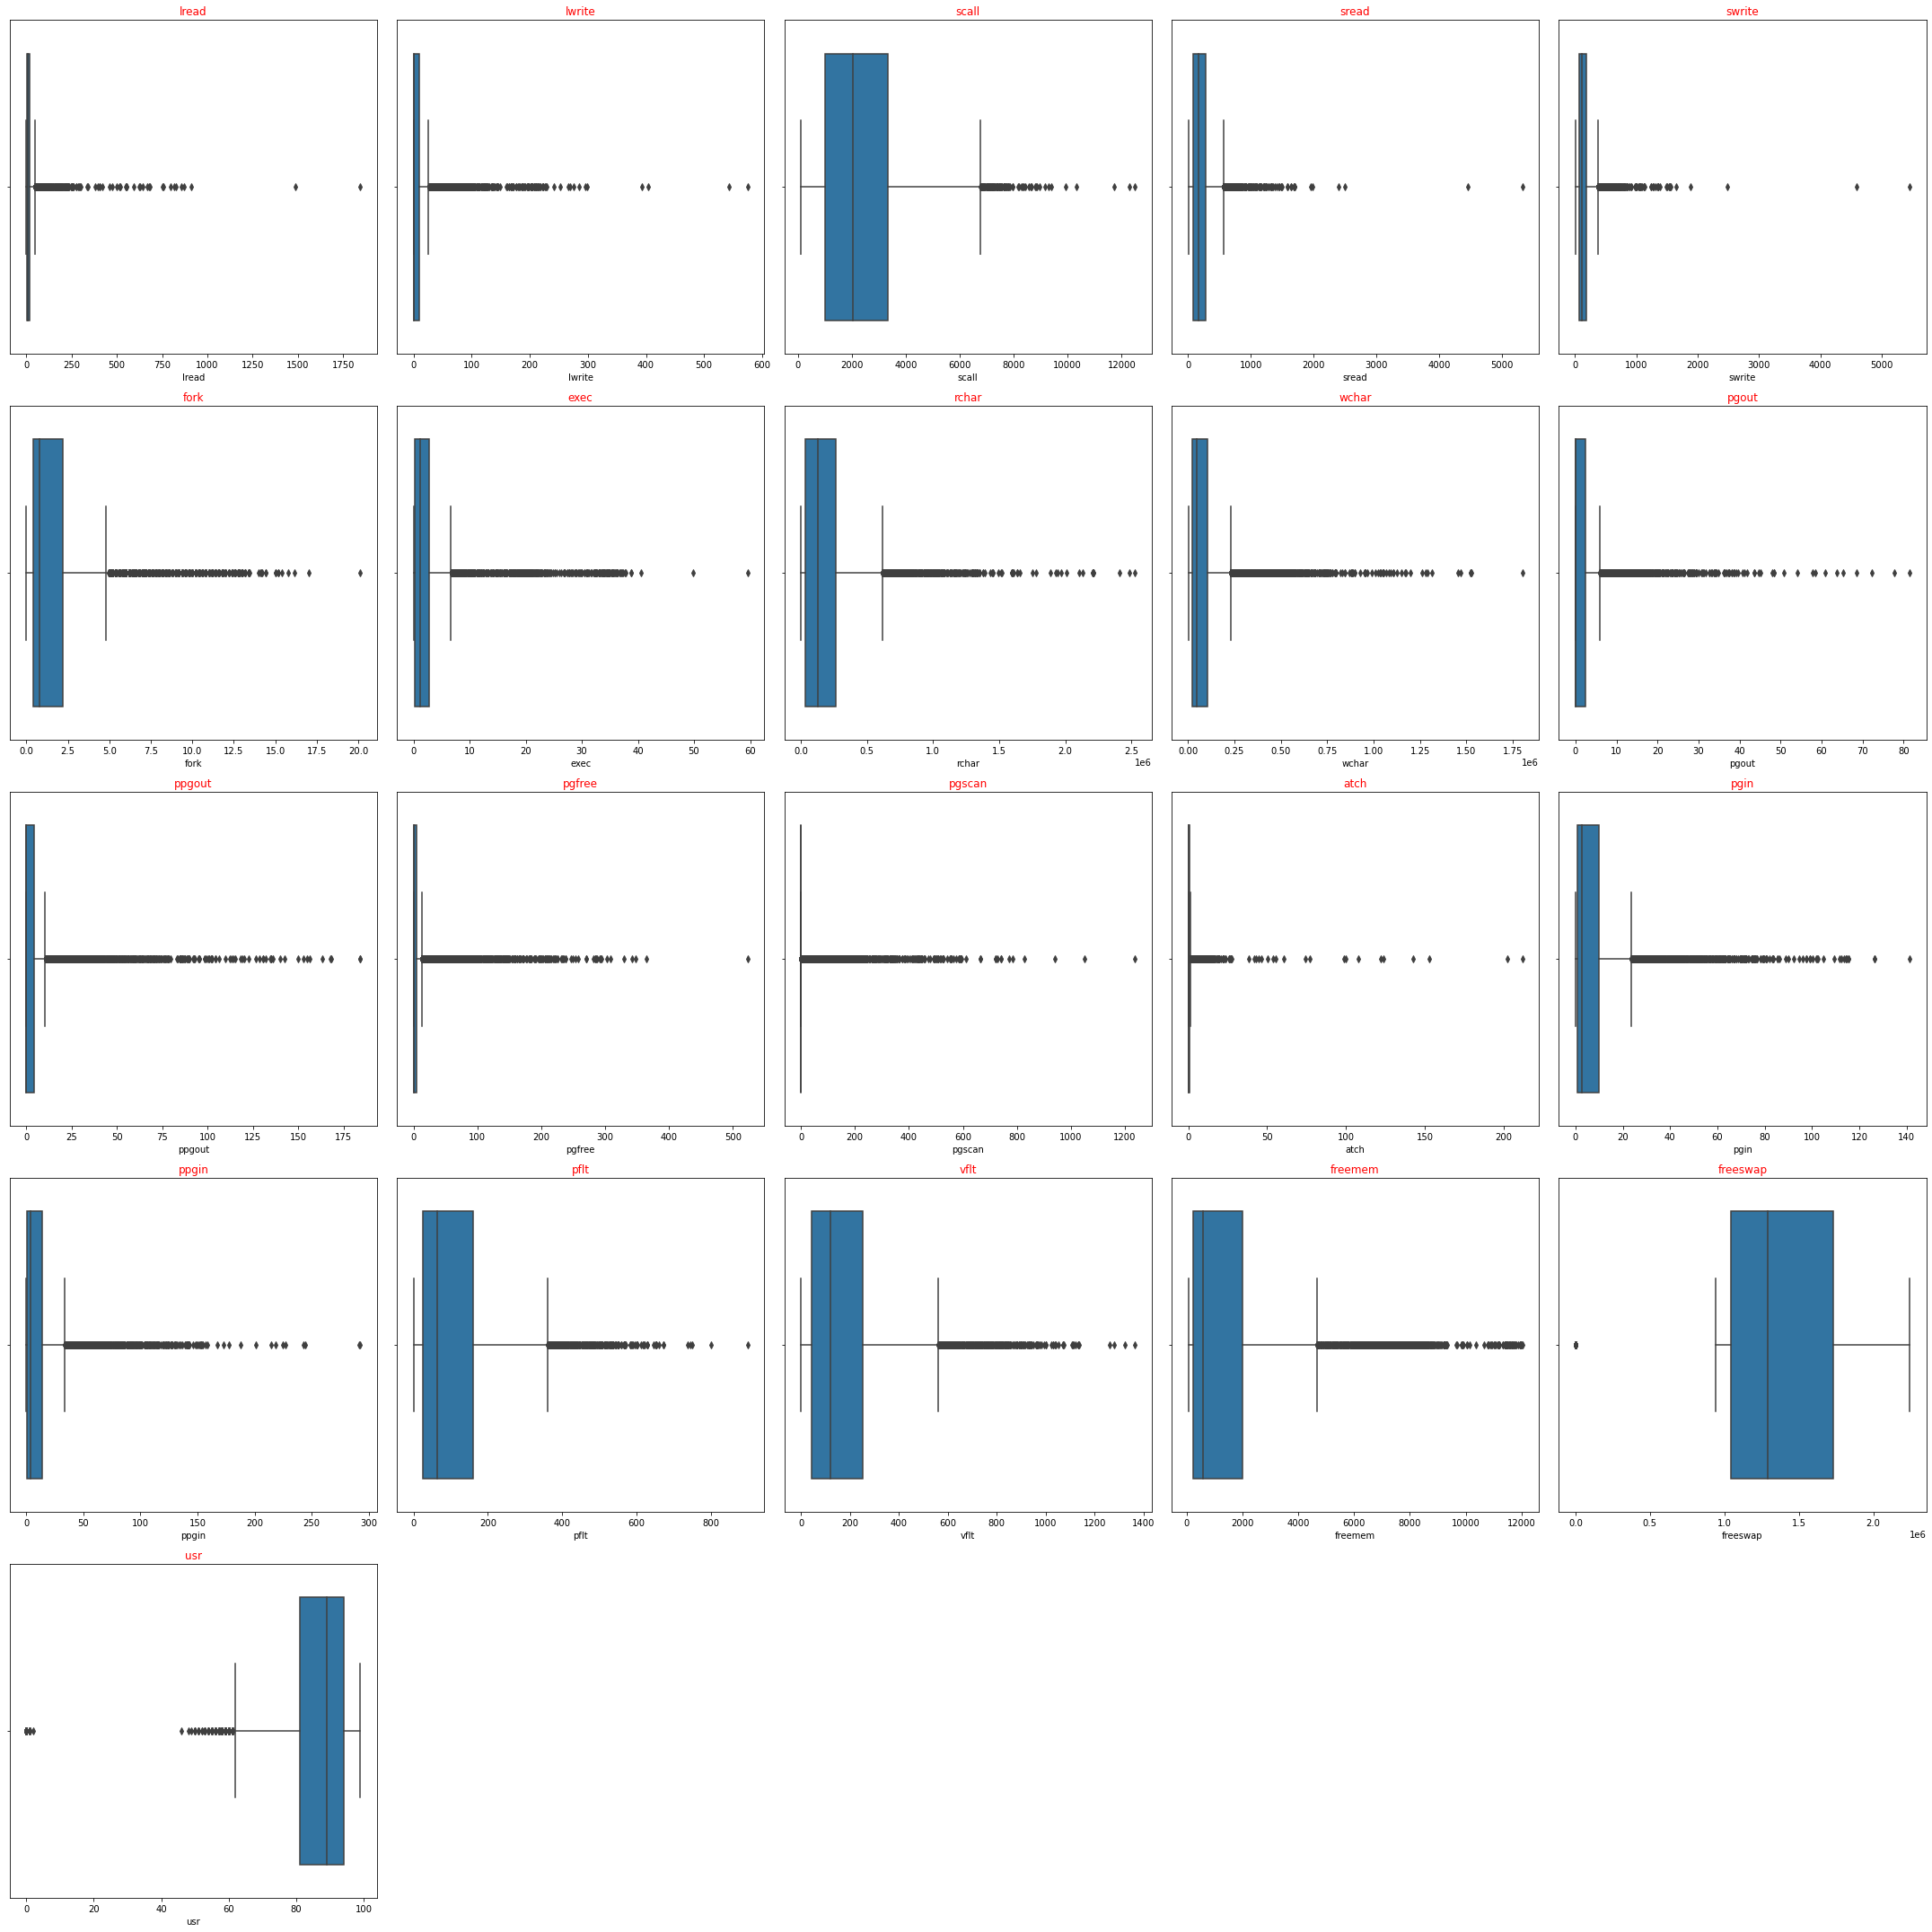

In [51]:
data_plot=df_num
fig=plt.figure(figsize=(30,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(5,5,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

Treating Outliers

In [52]:
def treat_outlier(x):

    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
   
    IQR=q75-q25
    
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)

    return x.apply(lambda y: q5 if y < lower_bound else y).apply(lambda y: dt if y > upper_bound else y)

In [53]:
def print_outlier(x):
    
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    min_val = min(x)
    max_val = max(x)
   
    IQR=q75-q25
    
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
 
    return ('5%=',q5,'Q1=',q25,'Q3=',q75,'IQR=',IQR,'LL=',lower_bound,'UL=', upper_bound, '95%', dt, 'max=',max_val, 'min=',min_val)

In [54]:
for i in df_num.columns:    
    df_num[i]=treat_outlier(df_num[i])

Checking for outliers

C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-p

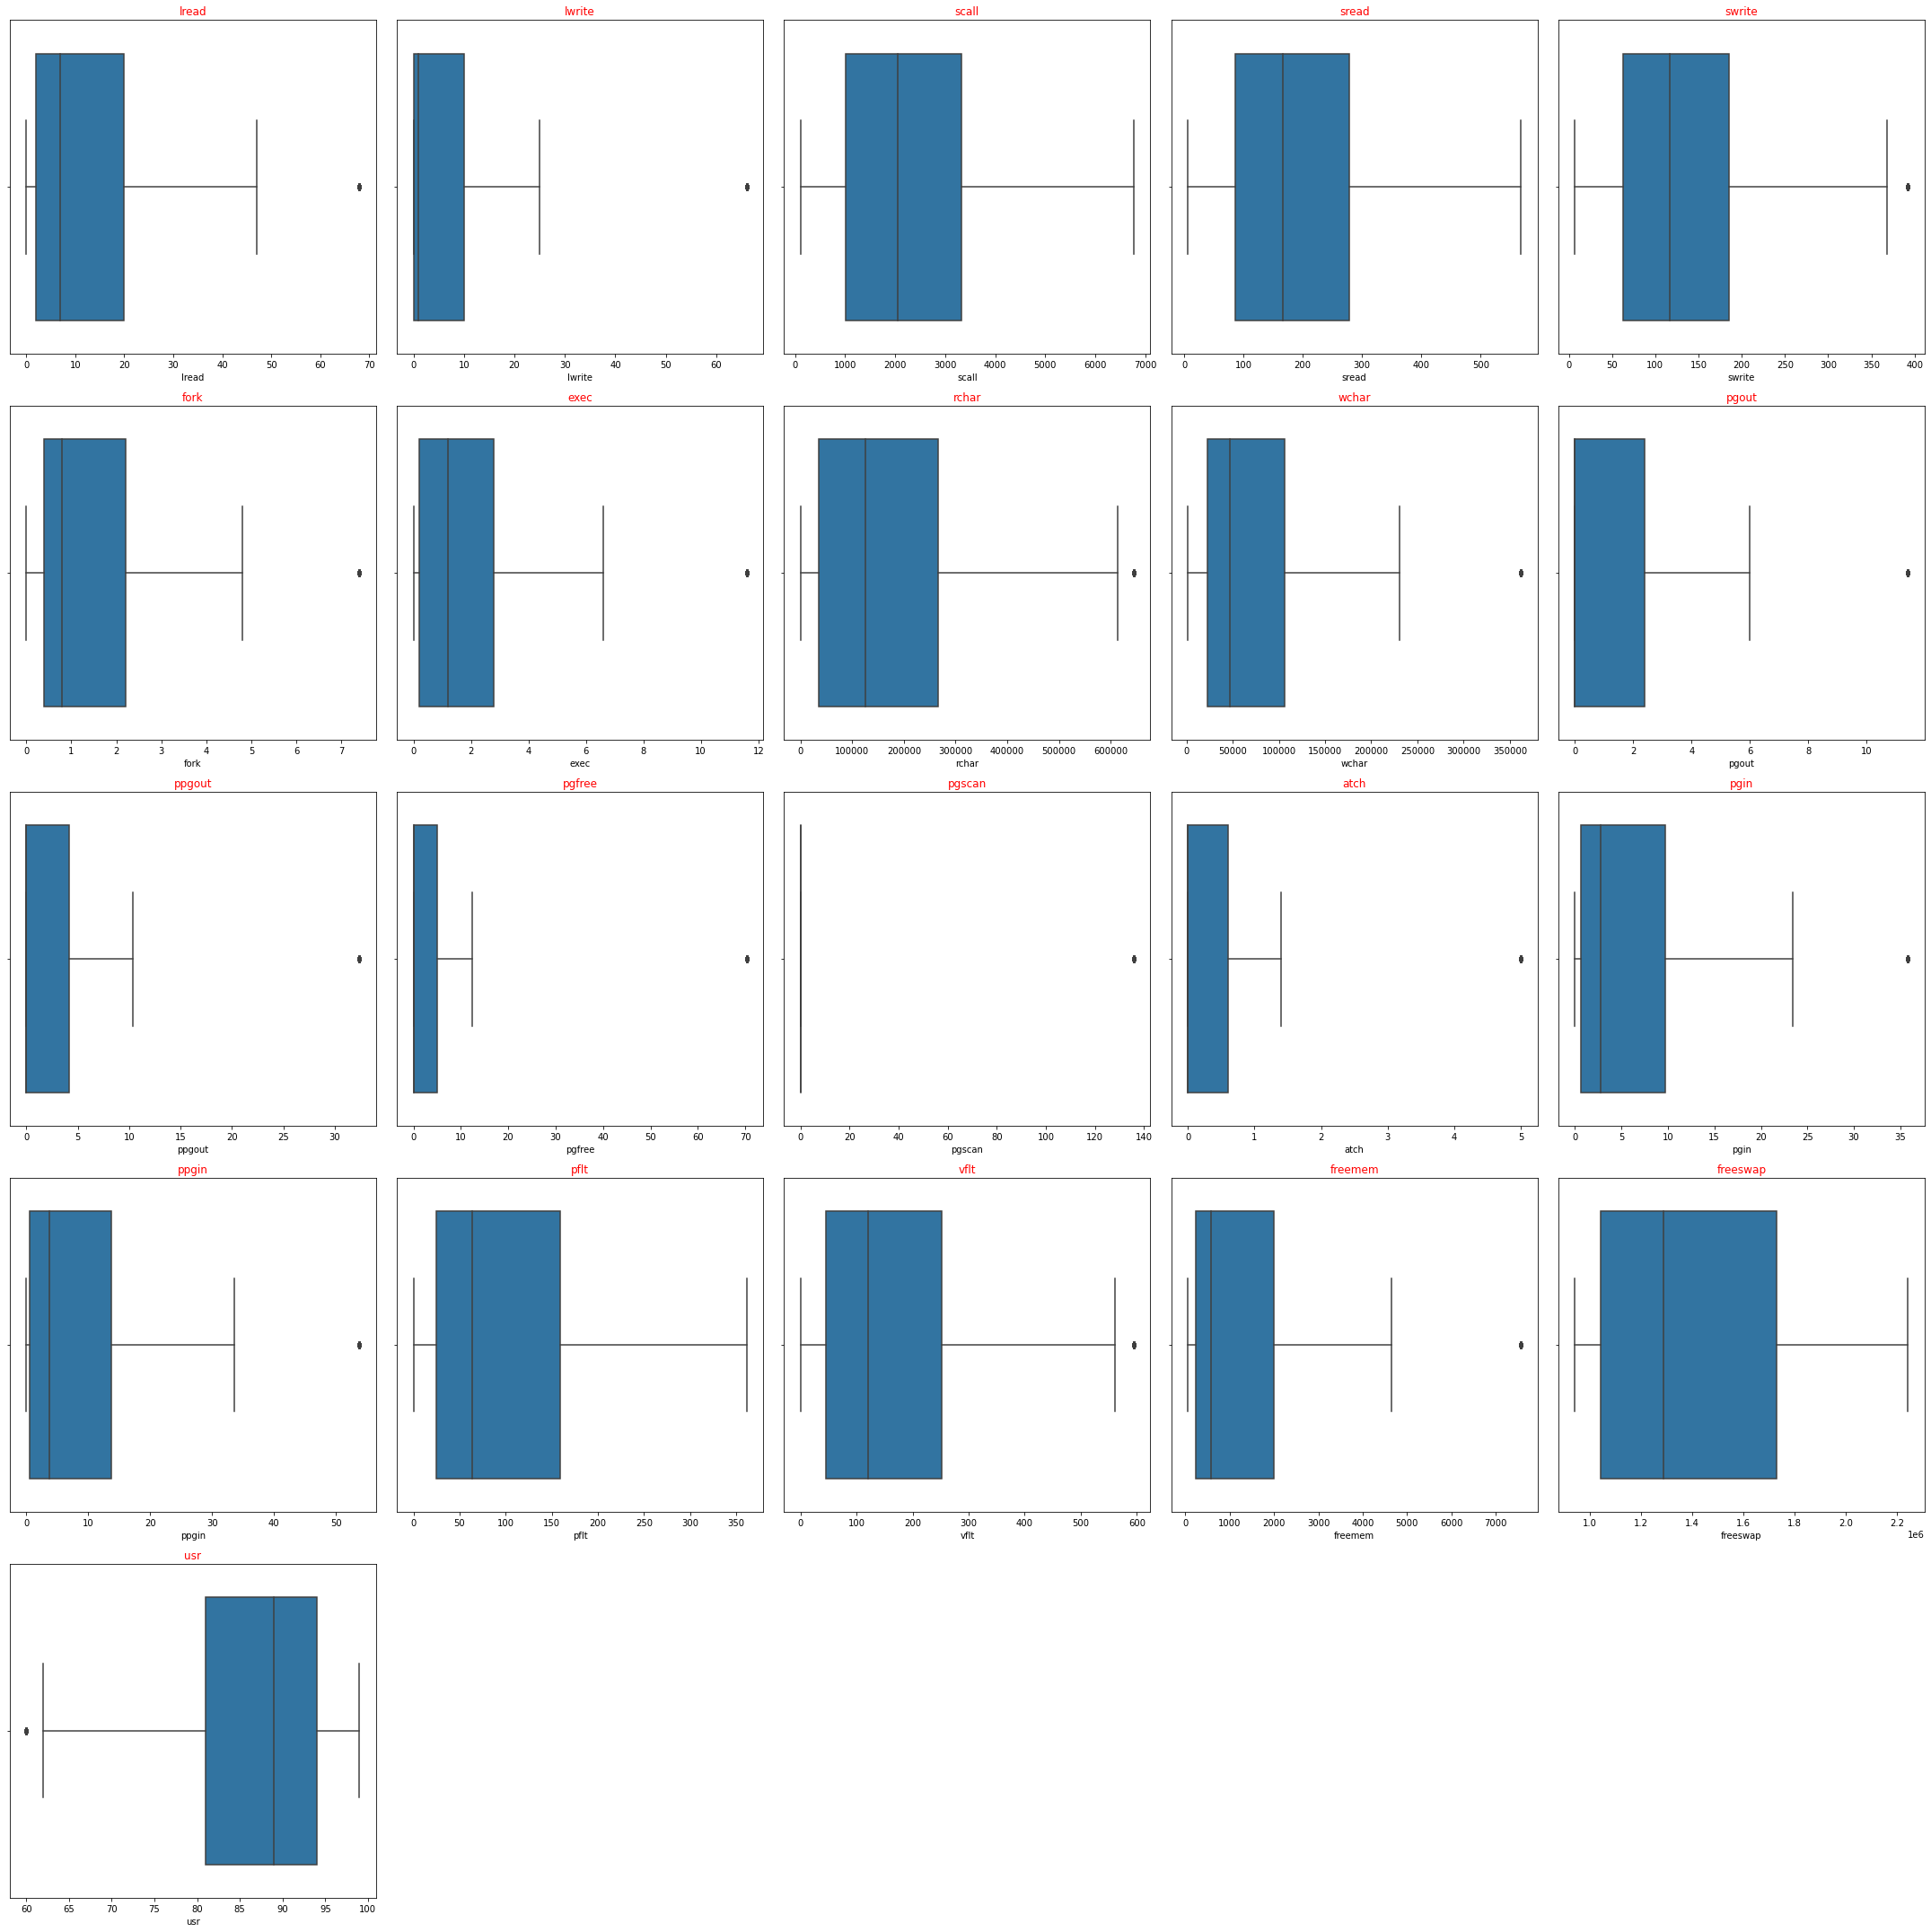

In [55]:
data_plot=df_num
fig=plt.figure(figsize=(30,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(5,5,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

Encode the data (having String values) for Modelling

In [66]:
#Converting object type to int type

for feature in m9.columns: 
    if m9[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(m9[feature].unique()))
        print(pd.Categorical(m9[feature].unique()).codes)
        m9[feature] = pd.Categorical(m9[feature]).codes

In [67]:
m9.dtypes

lread         int64
lwrite        int64
scall         int64
sread         int64
swrite        int64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
pgscan      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz         int8
freemem       int64
freeswap      int64
usr           int64
dtype: object

In [68]:
X = m9.drop('runqsz', axis=1)

# Copy target into the y dataframe. 
y = m9['runqsz']

Split the data into train and test (70:30)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [70]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (5734, 21)
Number of rows and columns of the training set for the dependent variable: (5734,)
Number of rows and columns of the test set for the independent variables: (2458, 21)
Number of rows and columns of the test set for the dependent variable: (2458,)


Apply LinearRegression

In [71]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.fit(X_test, y_test)

LinearRegression()

In [72]:
#R square on training data
regression_model.score(X_train, y_train)

0.18355317499040413

In [73]:
#R square on test data
regression_model.score(X_test, y_test)

0.19116878958477312

In [74]:
#Predictions on Test data
y_pred = regression_model.predict(X_test)
print(y_pred)

[0.70724301 0.92864659 0.17997624 ... 0.51837833 0.47080631 0.42508008]


In [75]:
#Predictions on Train data

y_pred1 = regression_model.predict(X_train)
print(y_pred1)

[0.51079117 0.80419911 0.02236291 ... 0.61885876 0.48520541 0.44197756]


In [76]:
#Root Mean Squared Error of Test data

print("R^2: {}".format(regression_model.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.19116878958477312
Root Mean Squared Error: 0.4490840224969097


In [79]:
#Root Mean Squared Error of train data

print("R^2: {}".format(regression_model.score(X_train, y_train)))
rmse = np.sqrt(mean_squared_error(y_train, y_pred1))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.18355317499040413
Root Mean Squared Error: 0.45097347479015737


In [81]:
regression_model.coef_

array([-6.86827012e-05,  3.94395209e-04, -8.61528255e-05,  2.23025161e-04,
        2.21200508e-04,  1.58539237e-02,  2.13158580e-03, -1.87127955e-07,
       -2.05538685e-07,  9.25219279e-03, -5.62336578e-04,  2.49387633e-05,
        1.09174089e-04, -1.32639160e-03,  1.66850197e-03, -1.69392296e-03,
        4.20387375e-04, -1.62820814e-04,  4.57629703e-05, -4.94932510e-07,
        1.25974804e-02])

In [85]:
#Model score on Test data
regression_model.score(X_test, y_test)

0.19116878958477312

In [86]:
#Model score on Train data
regression_model.score(X_train, y_train)

0.18355317499040413

In [87]:
regression_model.intercept_

0.1479122808771376

Perform checks for significant variables using appropriate method form statsmodel.

In [90]:
X_con=sm.add_constant(X)

In [91]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 runqsz   R-squared (uncentered):                  35.821
Model:                            OLS   Adj. R-squared (uncentered):             35.949
Method:                 Least Squares   F-statistic:                             -279.9
Date:                Sun, 18 Dec 2022   Prob (F-statistic):                        1.00
Time:                        14:18:27   Log-Likelihood:                         -3527.7
No. Observations:                5734   AIC:                                      7097.
Df Residuals:                    5713   BIC:                                      7237.
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lread          0.0002      0.000      1.395      0.163   -7.52e-05       0.000
lwrite        -0.0002      0.000     -0.965      0.335      -0.001       0.000
scall      -6.897e-05   5.49e-06    -12.572      0.000   -7.97e-05   -5.82e-05
sread       3.042e-05   7.59e-05      0.401      0.688      -0.000       0.000
swrite         0.0002   8.29e-05      2.713      0.007    6.24e-05       0.000
fork           0.0320      0.010      3.167      0.002       0.012       0.052
exec           0.0072      0.002      3.661      0.000       0.003       0.011
rchar      -1.496e-07   3.42e-08     -4.370      0.000   -2.17e-07   -8.25e-08
wchar      -7.895e-08   5.21e-08     -1.515      0.130   -1.81e-07    2.32e-08
pgout          0.0090      0.003      3.410      0.001       0.004       0.014
ppgout        -0.0021      0.002     -1.405      0.160      -0.005       0.001
pgfree         0.0011      0.001      1.373      0.170      -0.000       0.003
pgscan        -0.0001      0.000     -0.511      0.609      -0.001       0.000
atch          -0.0002      0.001     -0.174      0.862      -0.002       0.002
pgin          -0.0036      0.001     -2.946      0.003      -0.006      -0.001
ppgin          0.0027      0.001      3.451      0.001       0.001       0.004
pflt           0.0001      0.000      0.699      0.485      -0.000       0.000
vflt          -0.0002      0.000     -1.607      0.108      -0.000    4.87e-05
freemem     5.109e-05   3.16e-06     16.146      0.000    4.49e-05    5.73e-05
freeswap   -5.602e-07   2.46e-08    -22.758      0.000   -6.08e-07   -5.12e-07
usr            0.0150      0.000     39.468      0.000       0.014       0.016
==============================================================================
Omnibus:                    12473.351   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.035
Skew:                          -0.215   Prob(JB):                     5.63e-95
Kurtosis:                       1.722   Cond. No.                     2.42e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
print('The variation in the independent variable which is explained by the dependent variable is',round(model.rsquared*100,4),'%')

The variation in the independent variable which is explained by the dependent variable is 3582.1213 %


In [93]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.18355317499040413


In [94]:
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.19116878958477312


In [95]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [96]:
i=0
for column in X.columns:
    if i < 15:
        print (column ,"--->",  vif[i])
        i = i+1

lread ---> 1.7012428297830886
lwrite ---> 1.7051933310340046
scall ---> 7.103990146156456
sread ---> 14.552615438632646
swrite ---> 10.119734738288857
fork ---> 28.328032875517508
exec ---> 3.917267446141827
rchar ---> 3.3034618586627116
wchar ---> 2.2820570358394057
pgout ---> 6.390578867848633
ppgout ---> 16.977467689290666
pgfree ---> 20.07112159442969
pgscan ---> 8.301282920913339
atch ---> 1.1319786456144028
pgin ---> 10.387312423099543


1.4 Inference: Basis on these predictions, what are the business insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

Problem 2: Logistic Regression, LDA and CART

You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

Dataset for Problem 2: Contraceptive_method_dataset.xlsx

Data Dictionary:

1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

Reading the data

In [97]:
m10 = pd.read_excel("Desktop/Contraceptive_method_dataset.xlsx")

Checking the head

In [98]:
m10.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

Checking the tail

In [99]:
m10.tail()

Wife_age Wife_ education Husband_education  No_of_children_born  \
1468      33.0        Tertiary          Tertiary                  NaN   
1469      33.0        Tertiary          Tertiary                  NaN   
1470      39.0       Secondary         Secondary                  NaN   
1471      33.0       Secondary         Secondary                  NaN   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
1468   Scientology          Yes                   2                Very High   
1469   Scientology           No                   1                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
1468         Exposed                       Yes  
1469         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes

Checking the info

In [100]:
m10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


Describe the data

In [101]:
m10.describe()

Wife_age  No_of_children_born  Husband_Occupation
count  1402.000000          1452.000000         1473.000000
mean     32.606277             3.254132            2.137814
std       8.274927             2.365212            0.864857
min      16.000000             0.000000            1.000000
25%      26.000000             1.000000            1.000000
50%      32.000000             3.000000            2.000000
75%      39.000000             4.000000            3.000000
max      49.000000            16.000000            4.000000

Shape of the data

In [102]:
m10.shape

(1473, 10)

Checking for Null values

In [103]:
m10.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

Check for datatypes

In [143]:
m10.dtypes

Wife_age                     float64
Wife_education                object
Husband_education             object
No_of_children_born          float64
Wife_religion                 object
Wife_Working                  object
Husband_Occupation             int64
Standard_of_living_index      object
Media_exposure                object
Contraceptive_method_used     object
dtype: object

Check for correlation

In [142]:
corr1 = m10.corr()
corr1

Wife_age  No_of_children_born  Husband_Occupation
Wife_age             1.000000             0.541879           -0.179588
No_of_children_born  0.541879             1.000000           -0.016921
Husband_Occupation  -0.179588            -0.016921            1.000000

Treating Null values

In [104]:
m10['Wife_age'].fillna(m10.groupby('No_of_children_born')['Wife_age'].transform("mean"), inplace=True)

In [105]:
m10['No_of_children_born'].fillna(m10.groupby('No_of_children_born')['Wife_age'].transform("mean"), inplace=True)

Checking for Null values

In [106]:
m10.isnull().sum()

Wife_age                      0
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [107]:
m10.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

Renaming the columns

In [108]:
m10.rename({'Media_exposure ' : 'Media_exposure'}, axis=1 , inplace=True)

In [109]:
m10.rename({'Wife_ education' : 'Wife_education'}, axis=1 , inplace=True)

Checking the columns

In [110]:
m10.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure',
       'Contraceptive_method_used'],
      dtype='object')

Treating Null values

In [111]:
m10.No_of_children_born =m10.No_of_children_born.fillna(0)

In [112]:
m10.isnull().sum()

Wife_age                     0
Wife_education               0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

Checking duplicate values

In [114]:
m10.duplicated().sum()

80

In [115]:
m10.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1468    False
1469    False
1470    False
1471    False
1472    False
Length: 1473, dtype: bool

Treating duplicate values

In [118]:
m10.drop_duplicates(inplace=True)

In [119]:
m10.duplicated().sum()

0

Checking for outliers

In [120]:
df_num1= m10.select_dtypes(include=['float64','int64'])

C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


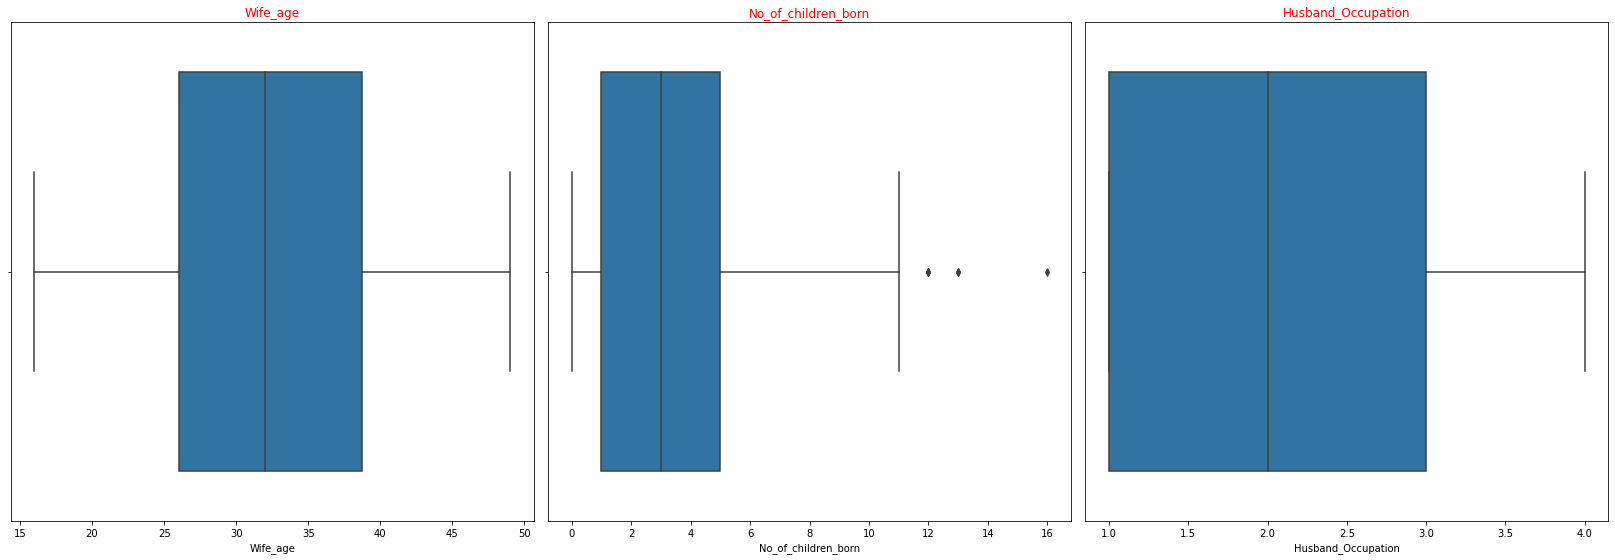

In [121]:
data_plot=df_num1
fig=plt.figure(figsize=(30,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

Treating Outliers

In [122]:
def treat_outlier(x):

    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
   
    IQR=q75-q25
    
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)

    return x.apply(lambda y: q5 if y < lower_bound else y).apply(lambda y: dt if y > upper_bound else y)

In [123]:
def print_outlier(x):
    
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    min_val = min(x)
    max_val = max(x)
   
    IQR=q75-q25
    
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
 
    return ('5%=',q5,'Q1=',q25,'Q3=',q75,'IQR=',IQR,'LL=',lower_bound,'UL=', upper_bound, '95%', dt, 'max=',max_val, 'min=',min_val)

In [124]:
for i in df_num1.columns:    
    df_num1[i]=treat_outlier(df_num1[i])

Checking Outliers

C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


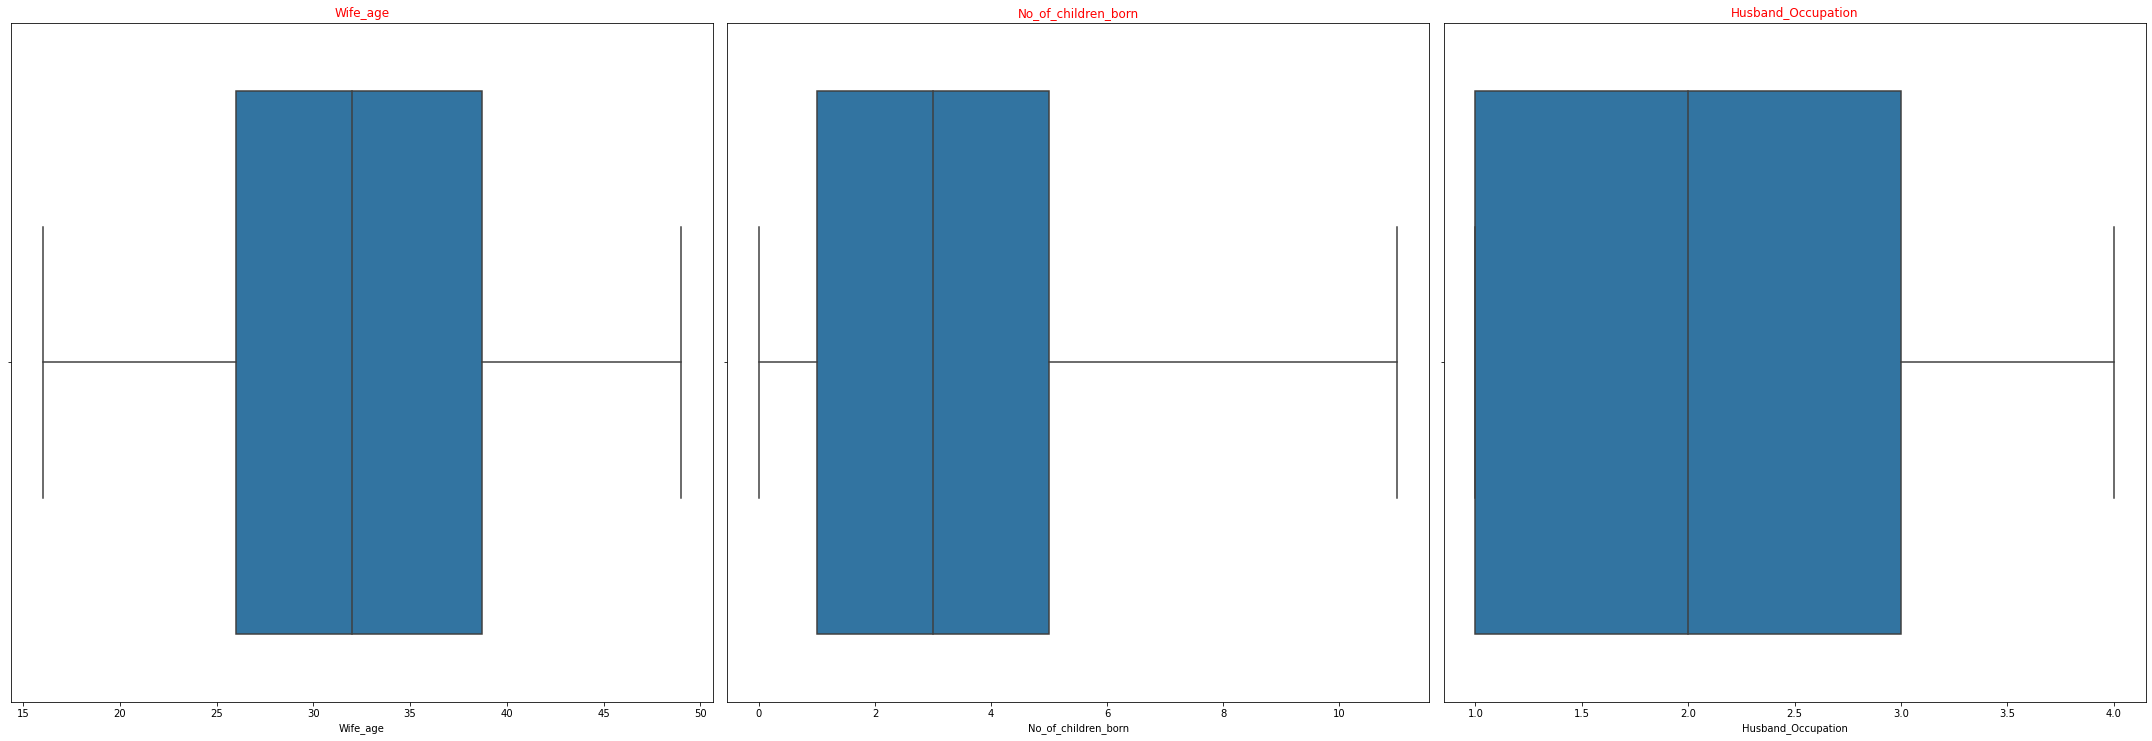

In [125]:
data_plot=df_num1
fig=plt.figure(figsize=(30,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

Univariate Analysis

array([[<AxesSubplot:title={'center':'Wife_age'}>,
        <AxesSubplot:title={'center':'No_of_children_born'}>],
       [<AxesSubplot:title={'center':'Husband_Occupation'}>,
        <AxesSubplot:>]], dtype=object)

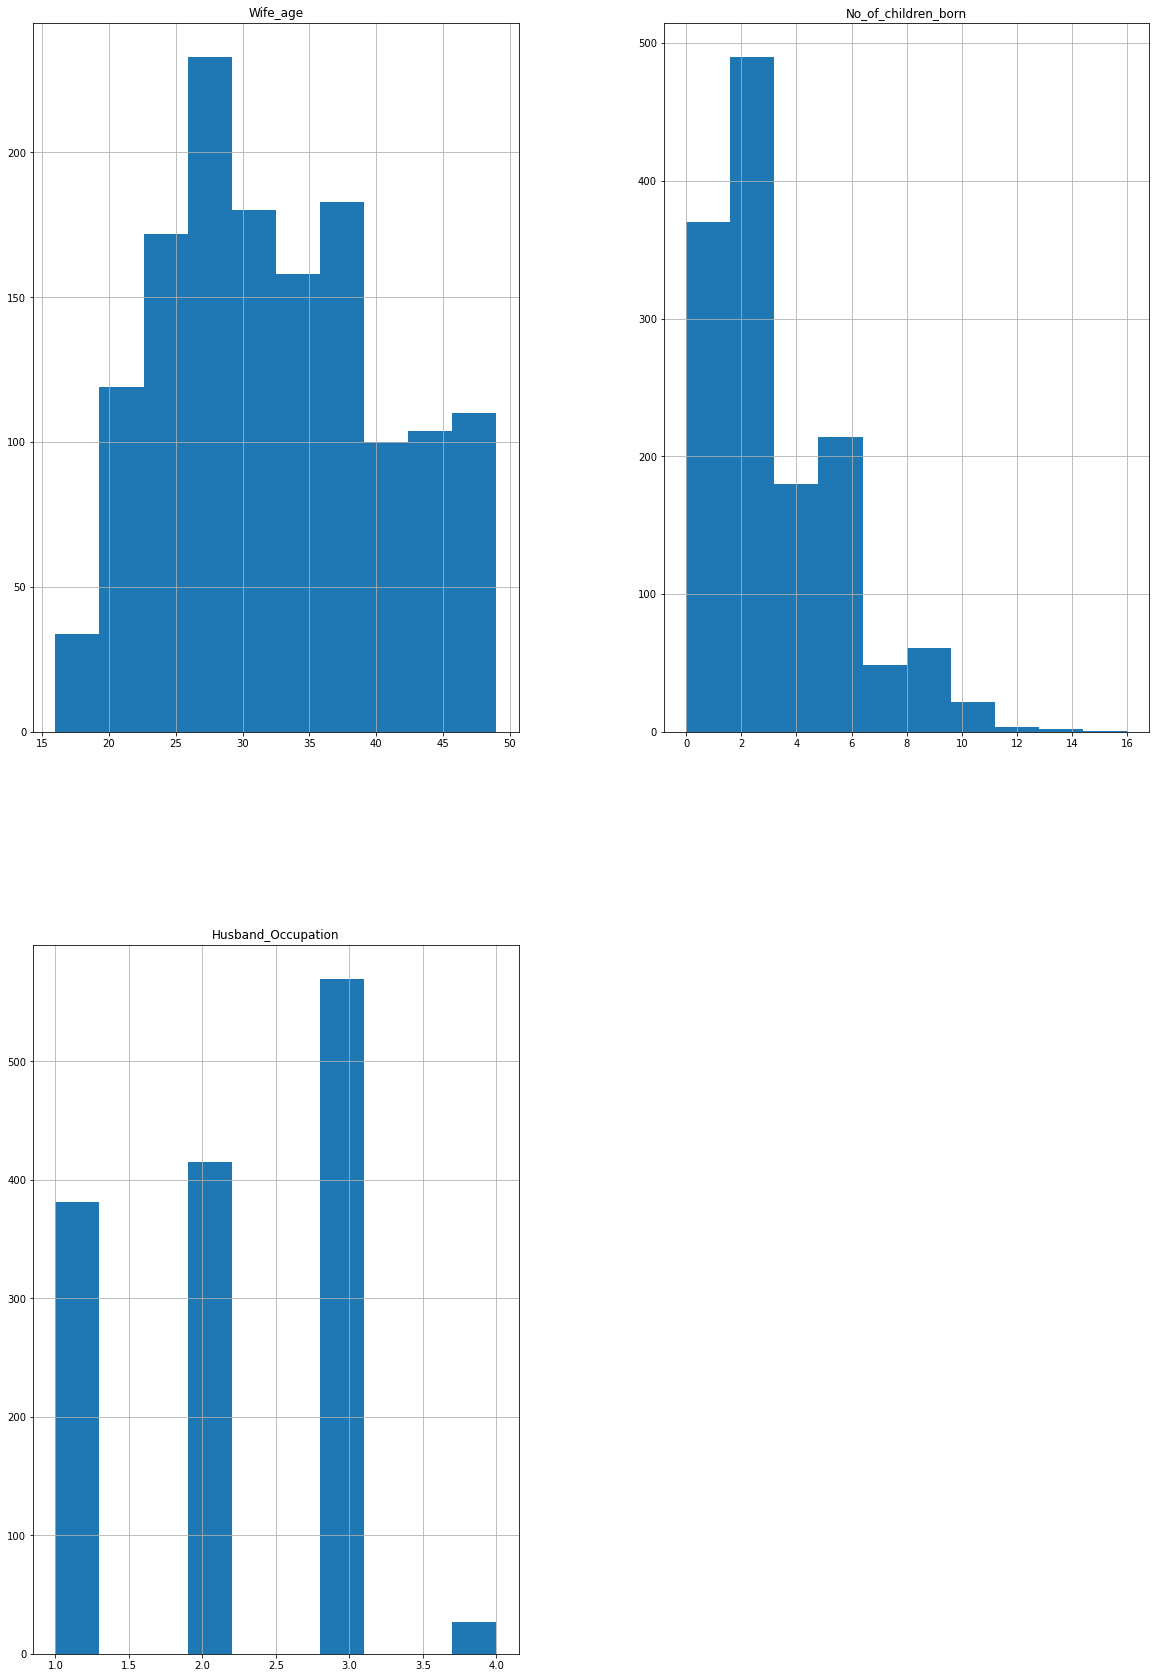

In [126]:
m10.hist(figsize=(20,30))

Bivariate Analysis

array(['Primary', 'Uneducated', 'Secondary', 'Tertiary'], dtype=object)

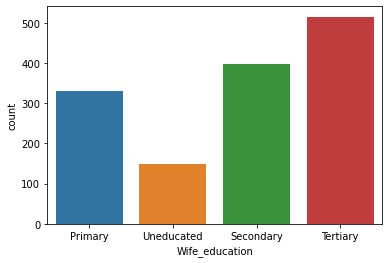

In [128]:
sns.countplot(x=m10['Wife_education'])
m10.Wife_education.unique()

array(['Secondary', 'Primary', 'Tertiary', 'Uneducated'], dtype=object)

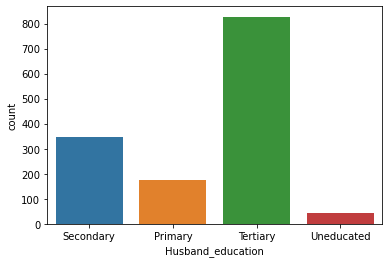

In [129]:
sns.countplot(x=m10['Husband_education'])
m10.Husband_education.unique()

array(['Scientology', 'Non-Scientology'], dtype=object)

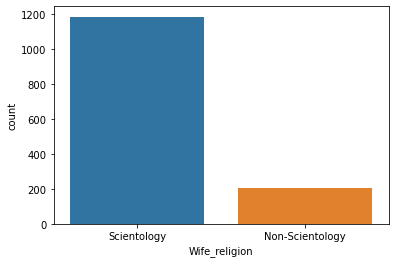

In [131]:
sns.countplot(x=m10['Wife_religion'])
m10.Wife_religion.unique()

array(['No', 'Yes'], dtype=object)

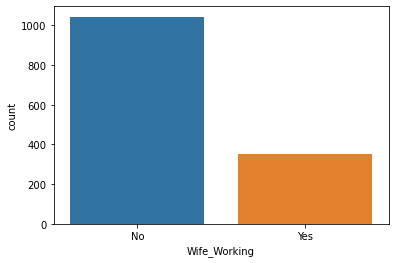

In [132]:
sns.countplot(x=m10['Wife_Working'])
m10.Wife_Working.unique()

<AxesSubplot:xlabel='Wife_age'>

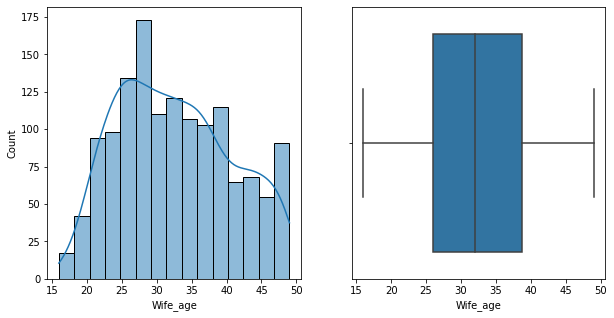

In [133]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(m10.Wife_age, kde=True, ax=axs[0])
sns.boxplot(x='Wife_age',data=m10, ax=axs[1])

<AxesSubplot:xlabel='No_of_children_born'>

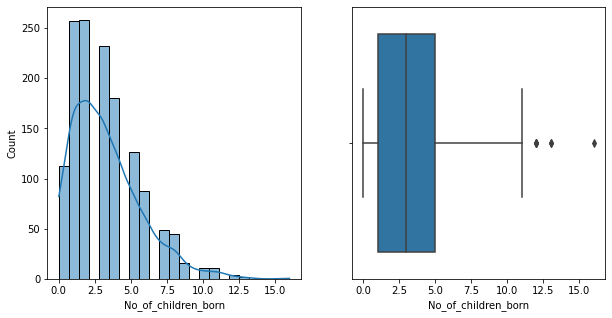

In [134]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(m10.No_of_children_born, kde=True, ax=axs[0])
sns.boxplot(x='No_of_children_born',data=m10, ax=axs[1])

<AxesSubplot:xlabel='Husband_Occupation'>

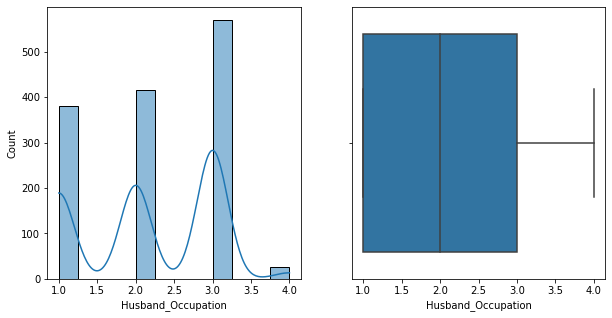

In [135]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(m10.Husband_Occupation, kde=True, ax=axs[0])
sns.boxplot(x='Husband_Occupation',data=m10, ax=axs[1])

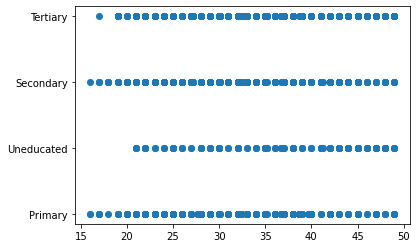

In [136]:
plt.scatter(m10['Wife_age'],m10['Wife_education'])

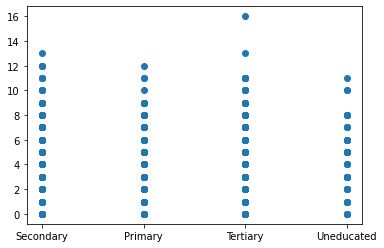

In [137]:
plt.scatter(m10['Husband_education'],m10['No_of_children_born'])

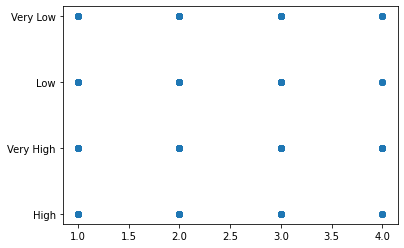

In [138]:
plt.scatter(m10['Husband_Occupation'],m10['Standard_of_living_index'])

<AxesSubplot:xlabel='Wife_age', ylabel='Wife_education'>

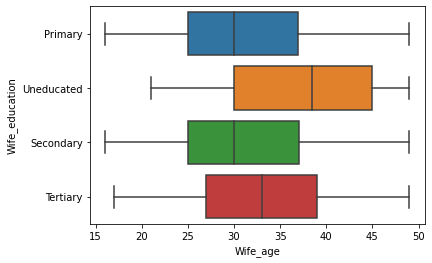

In [139]:
fig_dims = (12, 5)
sns.boxplot(x='Wife_age', y='Wife_education', data=m10)

<AxesSubplot:xlabel='Husband_education', ylabel='No_of_children_born'>

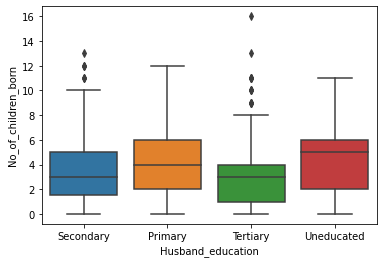

In [140]:
fig_dims = (12, 5)
sns.boxplot(x='Husband_education', y='No_of_children_born', data=m10)

<AxesSubplot:xlabel='Husband_Occupation', ylabel='Standard_of_living_index'>

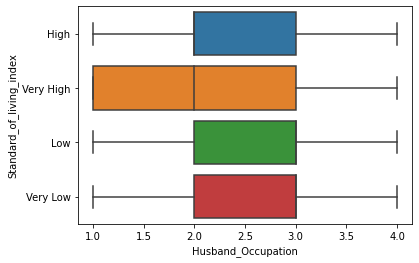

In [141]:
fig_dims = (12, 5)
sns.boxplot(x='Husband_Occupation', y='Standard_of_living_index', data=m10)

<AxesSubplot:>

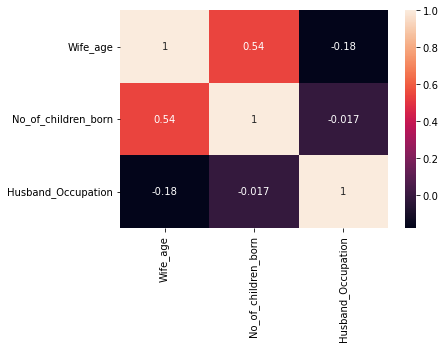

In [144]:
sns.heatmap(corr1, annot=True)

Multivariate Analysis

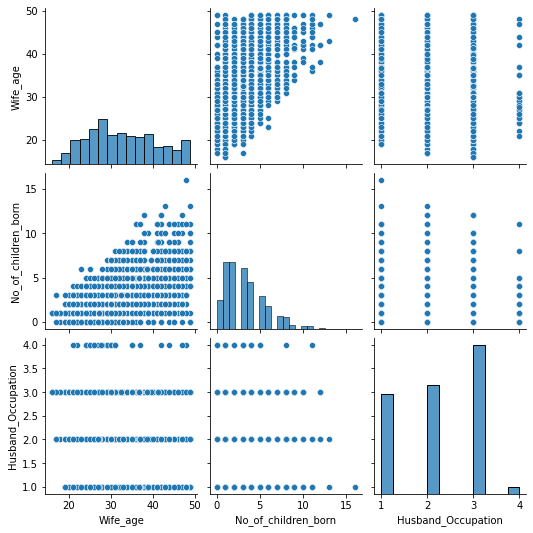

In [145]:
sns.pairplot(m10)
plt.show()

2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

Encode the data (having string values) for Modelling

In [262]:
m10.dtypes

Wife_age                     float64
Wife_education                  int8
Husband_education               int8
No_of_children_born          float64
Wife_religion                   int8
Wife_Working                    int8
Husband_Occupation             int64
Standard_of_living_index        int8
Media_exposure                  int8
Contraceptive_method_used       int8
dtype: object

In [190]:
for feature in m10.columns: 
    if m10[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(m10[feature].unique()))
        print(pd.Categorical(m10[feature].unique()).codes)
        m10[feature] = pd.Categorical(m10[feature]).codes

Data Split: Split the data into train and test (70:30).

In [191]:
X = m10.drop('Contraceptive_method_used',axis=1)
Y = m10.Contraceptive_method_used
test_size = 0.30
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

LogisticRegression

In [192]:
model = LogisticRegression(max_iter=10)
model.fit(X_train, y_train)
model.fit(X_test, y_test)

C:\Users\murb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LogisticRegression(max_iter=10)

In [193]:
model = LogisticRegression(solver='newton-cg',max_iter=10,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.2s finished


LogisticRegression(max_iter=10, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

LDA

In [194]:
X1 = m10.drop('Contraceptive_method_used',axis=1)
Y1 = m10.Contraceptive_method_used
test_size = 0.30
seed = 7

In [195]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=test_size, random_state=seed)

In [196]:
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X1,Y1)
model1

LinearDiscriminantAnalysis()

In [197]:
model1.coef_

array([[-0.0668744 ,  0.15266766,  0.14042352,  0.23783128, -0.61891864,
        -0.08690211, -0.08358572, -0.02844733, -1.1085146 ]])

In [198]:
model1.intercept_

array([2.10301196])

In [199]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )
dt_model.fit(X_train3, y_train3)

DecisionTreeClassifier()

In [200]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.241880  0.758120
1  0.213721  0.786279
2  0.900437  0.099563
3  0.751627  0.248373
4  0.425108  0.574892

CART

In [201]:
X3 = m10.drop('Contraceptive_method_used',axis=1)
Y3 = m10.Contraceptive_method_used
test_size = 0.30
seed = 7

In [202]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=test_size, random_state=seed)

In [203]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [204]:
dt_model.fit(X_train3, y_train3)

DecisionTreeClassifier()

In [205]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


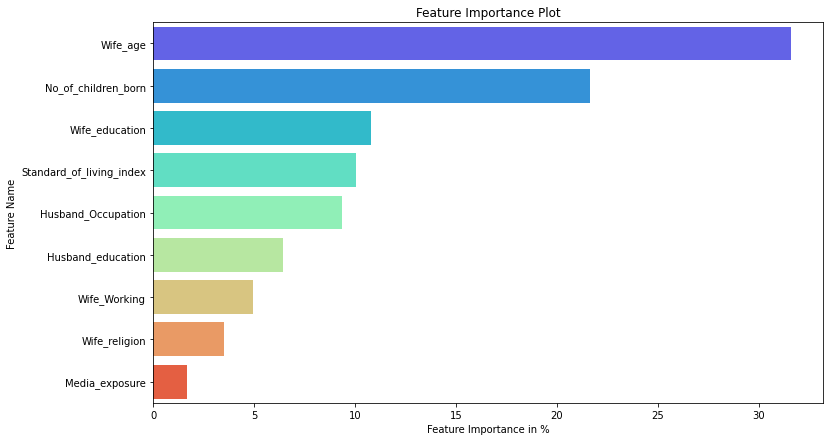

In [206]:
x=pd.DataFrame(dt_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

Logistic Regression 

In [207]:
X = m10.drop('Contraceptive_method_used',axis=1)
Y = m10.Contraceptive_method_used
test_size = 0.30
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [208]:
y_predict1 = model.predict(X_test)
y_predict2 = model.predict(X_train)

In [209]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.241880  0.758120
1  0.213721  0.786279
2  0.900437  0.099563
3  0.751627  0.248373
4  0.425108  0.574892

In [210]:
model_score = model.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.6483253588516746


In [213]:
model_score1 = model.score(X_train, y_train)
print('Accuracy Score is ',model_score1)

Accuracy Score is  0.6348717948717949


In [216]:
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict1))
print(metrics.classification_report(y_test, y_predict1))

0.6483253588516746
[[ 74 107]
 [ 40 197]]
              precision    recall  f1-score   support

           0       0.65      0.41      0.50       181
           1       0.65      0.83      0.73       237

    accuracy                           0.65       418
   macro avg       0.65      0.62      0.61       418
weighted avg       0.65      0.65      0.63       418



In [217]:
model_score1 = model.score(X_train, y_train)
print(model_score1)
print(metrics.confusion_matrix(y_train, y_predict2))
print(metrics.classification_report(y_train, y_predict2))

0.6348717948717949
[[181 252]
 [104 438]]
              precision    recall  f1-score   support

           0       0.64      0.42      0.50       433
           1       0.63      0.81      0.71       542

    accuracy                           0.63       975
   macro avg       0.63      0.61      0.61       975
weighted avg       0.63      0.63      0.62       975



C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


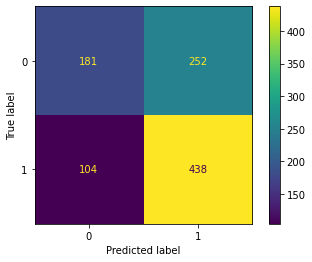

In [218]:
plot_confusion_matrix(model,X_train,y_train)

C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


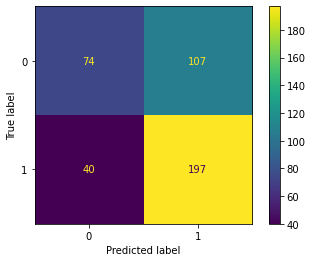

In [219]:
plot_confusion_matrix(model,X_test,y_test)

AUC: 0.656


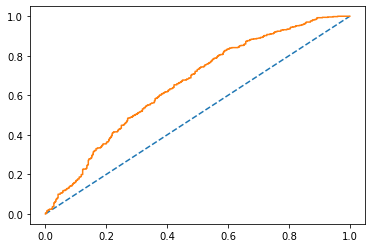

In [220]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.656


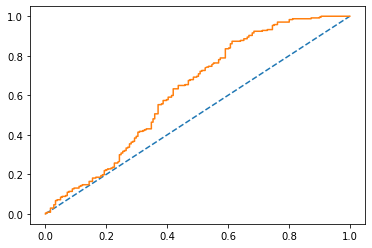

In [221]:
# predict probabilities
probs1 = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
# calculate AUC
test_auc1 = roc_auc_score(y_test, probs1)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr1, test_tpr1, test_thresholds1 = roc_curve(y_test, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr1, test_tpr1);

LDA

In [222]:
pred_class1 = model1.predict(X_test1)

In [223]:
pred_class2 = model1.predict(X_train1)

In [224]:
# Training Data Probability Prediction
pred_prob_train = model1.predict_proba(X_train1)

# Test Data Probability Prediction
pred_prob_test = model1.predict_proba(X_test1)

In [231]:
model_score2 = model1.score(X_test1, y_test1)
print('Accuracy Score is ',model_score2)

Accuracy Score is  0.6483253588516746


In [230]:
model_score3 = model1.score(X_train1, y_train1)
print('Accuracy Score is ',model_score3)

Accuracy Score is  0.6461538461538462


In [232]:
model_score2 = model1.score(X_test1, y_test1)
print(model_score2)
print(metrics.confusion_matrix(y_test1, pred_class1))
print(metrics.classification_report(y_test1, pred_class1))

0.6483253588516746
[[ 71 110]
 [ 37 200]]
              precision    recall  f1-score   support

           0       0.66      0.39      0.49       181
           1       0.65      0.84      0.73       237

    accuracy                           0.65       418
   macro avg       0.65      0.62      0.61       418
weighted avg       0.65      0.65      0.63       418



In [233]:
model_score3 = model1.score(X_train1, y_train1)
print(model_score3)
print(metrics.confusion_matrix(y_train1, pred_class2))
print(metrics.classification_report(y_train1, pred_class2))

0.6461538461538462
[[182 251]
 [ 94 448]]
              precision    recall  f1-score   support

           0       0.66      0.42      0.51       433
           1       0.64      0.83      0.72       542

    accuracy                           0.65       975
   macro avg       0.65      0.62      0.62       975
weighted avg       0.65      0.65      0.63       975



AUC: 0.656


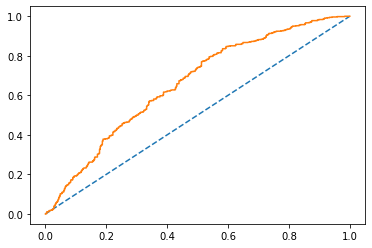

In [234]:
# predict probabilities
probs2 = model1.predict_proba(X_train1)
# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]
# calculate AUC
auc2 = roc_auc_score(y_train1, probs2)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr2, train_tpr2, train_thresholds2 = roc_curve(y_train1, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr2, train_tpr2);

AUC: 0.656


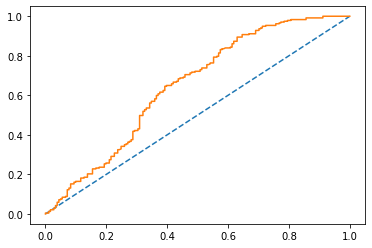

In [235]:
# predict probabilities
probs3 = model1.predict_proba(X_test1)
# keep probabilities for the positive outcome only
probs3 = probs3[:, 1]
# calculate AUC
auc3 = roc_auc_score(y_test1, probs3)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr3, train_tpr3, train_thresholds3 = roc_curve(y_test1, probs3)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr3, train_tpr3);

CART

In [248]:
ytrain_predict3 = dt_model.predict(X_train3)
ytest_predict3 = dt_model.predict(X_test3)

In [249]:
model_score4 = dt_model.score(X_test3, y_test3)
print('Accuracy Score is ',model_score4)

Accuracy Score is  0.6220095693779905


In [250]:
model_score5 = dt_model.score(X_test3, y_test3)
print('Accuracy Score is ',model_score5)

Accuracy Score is  0.6220095693779905


In [251]:
model_score4 = dt_model.score(X_test3, y_test3)
print(model_score4)
print(metrics.confusion_matrix(y_test3, ytest_predict3))
print(metrics.classification_report(y_test3, ytest_predict3))

0.6220095693779905
[[107  74]
 [ 84 153]]
              precision    recall  f1-score   support

           0       0.56      0.59      0.58       181
           1       0.67      0.65      0.66       237

    accuracy                           0.62       418
   macro avg       0.62      0.62      0.62       418
weighted avg       0.62      0.62      0.62       418



In [252]:
model_score5 = dt_model.score(X_train3, y_train3)
print(model_score4)
print(metrics.confusion_matrix(y_train3, ytrain_predict3))
print(metrics.classification_report(y_train3, ytrain_predict3))

0.6220095693779905
[[433   0]
 [ 16 526]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       433
           1       1.00      0.97      0.99       542

    accuracy                           0.98       975
   macro avg       0.98      0.99      0.98       975
weighted avg       0.98      0.98      0.98       975



In [265]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('Desktop/bnmura.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train3), class_names = list(train_char_label))

Credit_Tree_File.close()

AUC: 0.656


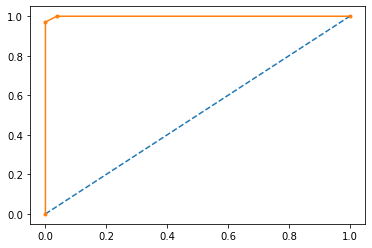

In [254]:
# AUC and ROC for the training data

# predict probabilities
probs4 = dt_model.predict_proba(X_train3)
# keep probabilities for the positive outcome only
probs4 = probs4[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc4 = roc_auc_score(y_train3, probs4)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr4, tpr4, thresholds4 = roc_curve(y_train3, probs4)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr4, tpr4, marker='.')
# show the plot
plt.show()

AUC: 0.656


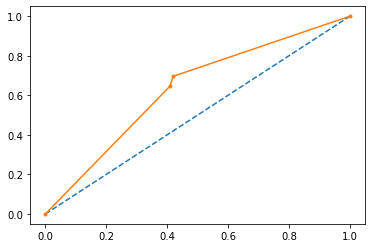

In [255]:
# AUC and ROC for the test data

# predict probabilities
probs5 = dt_model.predict_proba(X_test3)
# keep probabilities for the positive outcome only
probs5 = probs5[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc5 = roc_auc_score(y_test3, probs5)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr5, tpr5, thresholds5 = roc_curve(y_test3, probs5)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr5, tpr5, marker='.')
# show the plot
plt.show()

In [256]:
grid={'penalty':['l2','none','l1','elasticnet'],
      'solver':['sag','lbfgs','newton-cg','saga','liblinear'],
      'max_iter':[1000,5000,10000],
      'tol':[0.01,0.001,0.0001]
     }

In [261]:
param_grid = {
    'max_depth': [3,5,7,9,11,13,15],# 3,5,7,9
    'min_samples_leaf': [3,5,10,20,40,80,120], # 1-3% TRAIN DATA
    'min_samples_split': [9,15,30,60,120,240,360],#3X min sample leaf
}

dtr= DecisionTreeRegressor()

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 5)


grid_search.fit(X_train3,y_train3)

print(grid_search.best_params_)

{'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 60}


2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.